In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade scikit-learn

# **IMPORTING THE LIBRARIES**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.gridspec as gridspec


In [ ]:

# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200



# **READING THE DATASET**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# **REVIEWING THE DATASET**

In [ ]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
df.shape


(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

# **SUMMARY OF DATASET**
---

*  The dataset includes data for 303 patients.
*   There are 14 columns containing various patient attributes and test results.
*   There is no missing values.
*   The oldpeak column is the **ONLY** float64 data type.
*   The remaining columns are int64 data type.

# https://archive.ics.uci.edu/dataset/45/heart+disease

Explaining what each column in the dataset actually represents from the original data resource

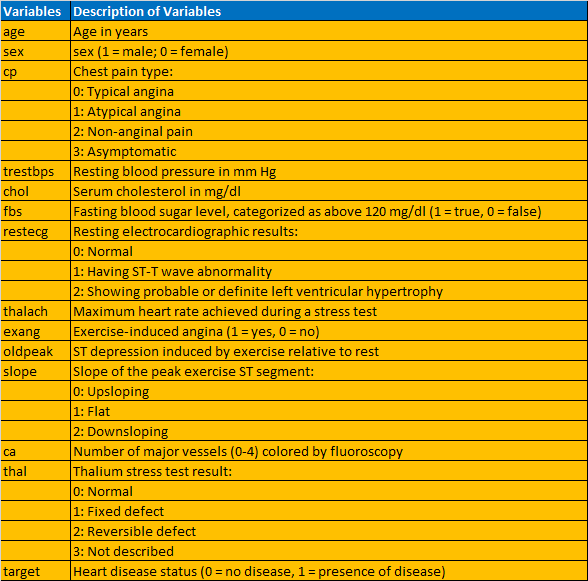

In [ ]:
#modify the column names to facilitate comprehension during the exploratory data analysis phase

df.columns = ['age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar', 'resting_ecg',
              'max_heart_rate_achieved', 'exercise_angina',
              'st_depression_induced_by_exercise', 'st_slope',
              'num_major_vessels', 'thalium_stress_test_result',
              'heart_condition']


In [ ]:
df.columns

Index(['age', 'gender', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg',
       'max_heart_rate_achieved', 'exercise_angina',
       'st_depression_induced_by_exercise', 'st_slope', 'num_major_vessels',
       'thalium_stress_test_result', 'heart_condition'],
      dtype='object')

In [ ]:
df.nunique()

age                                   41
gender                                 2
chest_pain_type                        4
resting_blood_pressure                49
cholesterol                          152
fasting_blood_sugar                    2
resting_ecg                            3
max_heart_rate_achieved               91
exercise_angina                        2
st_depression_induced_by_exercise     40
st_slope                               3
num_major_vessels                      5
thalium_stress_test_result             4
heart_condition                        2
dtype: int64

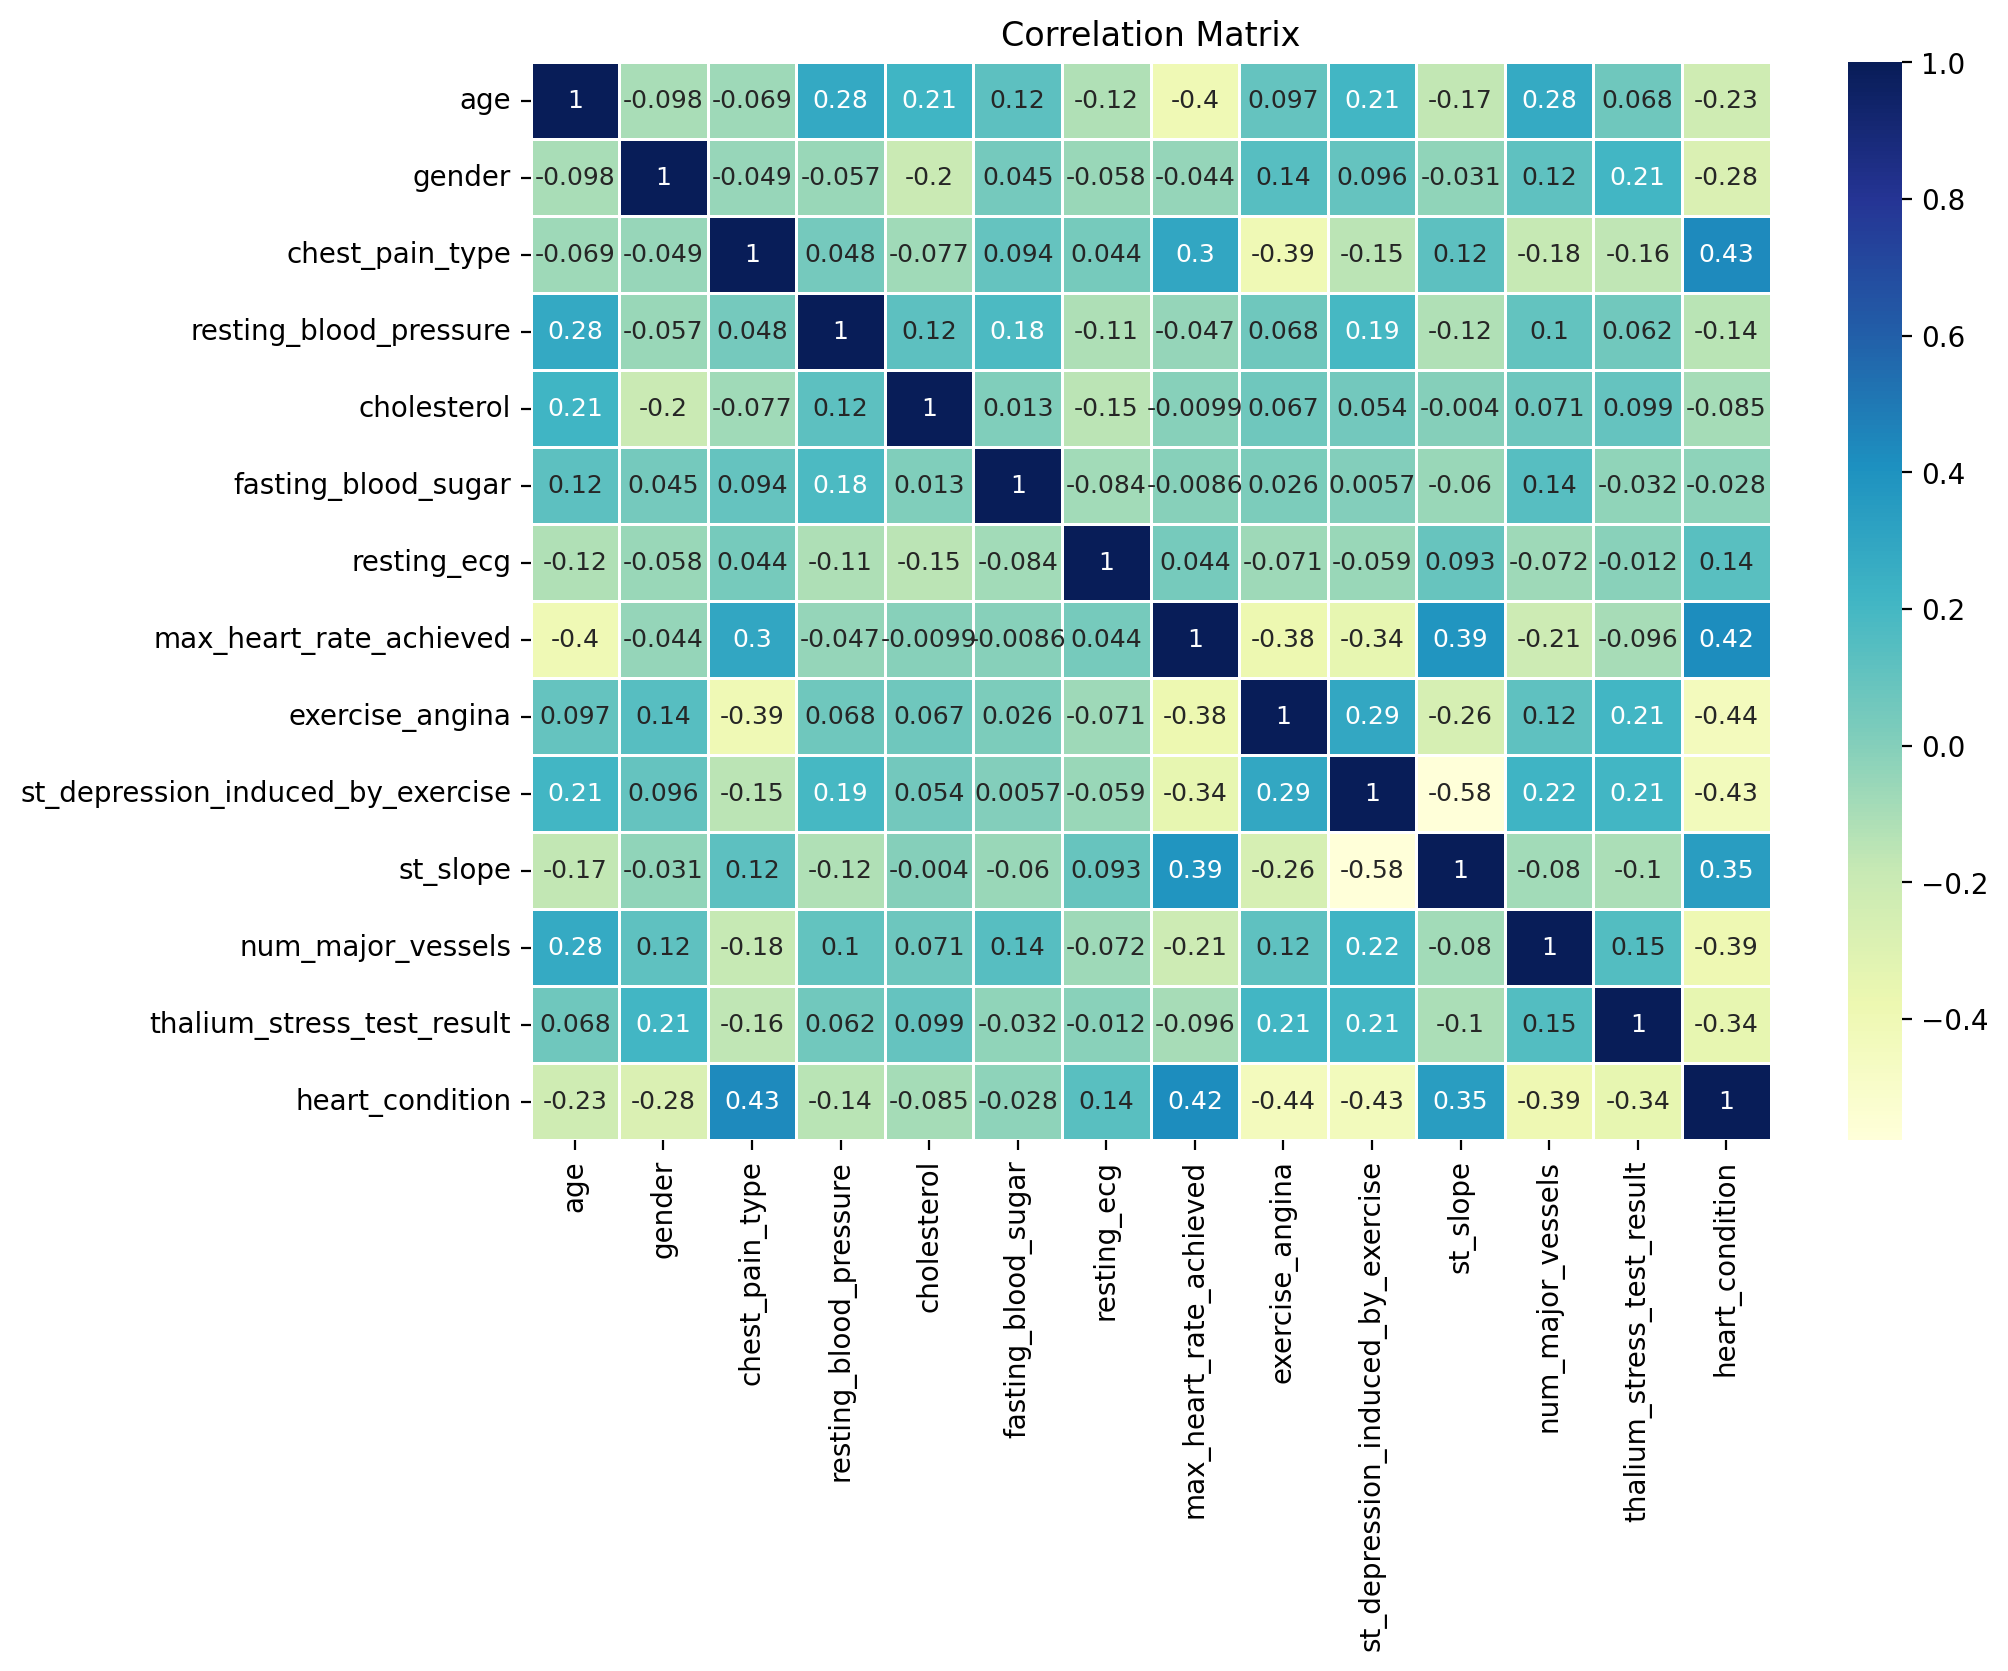

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 7))
custom_cmap = cm.get_cmap('YlGnBu')
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, linewidths=0.9, annot_kws={"size": 9})
plt.title('Correlation Matrix')
plt.show()


In [ ]:

# Define mappings for each column
gender_mapping = {1: 'male', 0: 'female'}
chest_pain_mapping = {0: 'typical_angina',
                      1: 'atypical_angina',
                      2: 'non_anginal_pain',
                      3: 'asymptomatic',
                      4: 'not_described'}
fbs_mapping = {0: 'less_than_120mg/ml',
               1: 'greater_than_120mg/ml'}
rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T_wave_abnormality',
                    2: 'left_ventricular_hypertrophy'}
exercise_angina_mapping = {0: 'no',
                           1: 'yes'}
st_slope_mapping = {0: 'upsloping',
                    1: 'flat',
                    2: 'downsloping'}
thalium_stress_mapping = {0: 'normal',
                          1: 'fixed_defect',
                          2: 'reversible_defect',
                          3: 'not_described'}
heart_condition_mapping = {0: 'no_disease',
                           1: 'has_disease'}

# Apply mappings using the replace() function
df['gender'] = df['gender'].replace(gender_mapping)
df['chest_pain_type'] = df['chest_pain_type'].replace(chest_pain_mapping)
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace(fbs_mapping)
df['resting_ecg'] = df['resting_ecg'].replace(rest_ecg_mapping)
df['exercise_angina'] = df['exercise_angina'].replace(exercise_angina_mapping)
df['st_slope'] = df['st_slope'].replace(st_slope_mapping)
df['thalium_stress_test_result'] = df['thalium_stress_test_result'].replace(thalium_stress_mapping)
df['heart_condition'] = df['heart_condition'].replace(heart_condition_mapping)


In [ ]:
df['heart_condition']

0      has_disease
1      has_disease
2      has_disease
3      has_disease
4      has_disease
          ...     
298     no_disease
299     no_disease
300     no_disease
301     no_disease
302     no_disease
Name: heart_condition, Length: 303, dtype: object

# **Separating the categorical and numerical data on behalf of unique values of dataframe**

In [ ]:
categorical = [i for i in df.loc[:,df.nunique()<=6]]
numerical = [i for i in df.loc[:,df.nunique()>=6]]

In [ ]:
categorical

['gender',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'st_slope',
 'num_major_vessels',
 'thalium_stress_test_result',
 'heart_condition']

In [ ]:
numerical

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression_induced_by_exercise']

# **UNIVARIATE ANALYSIS FOR NUMERICAL DATA**

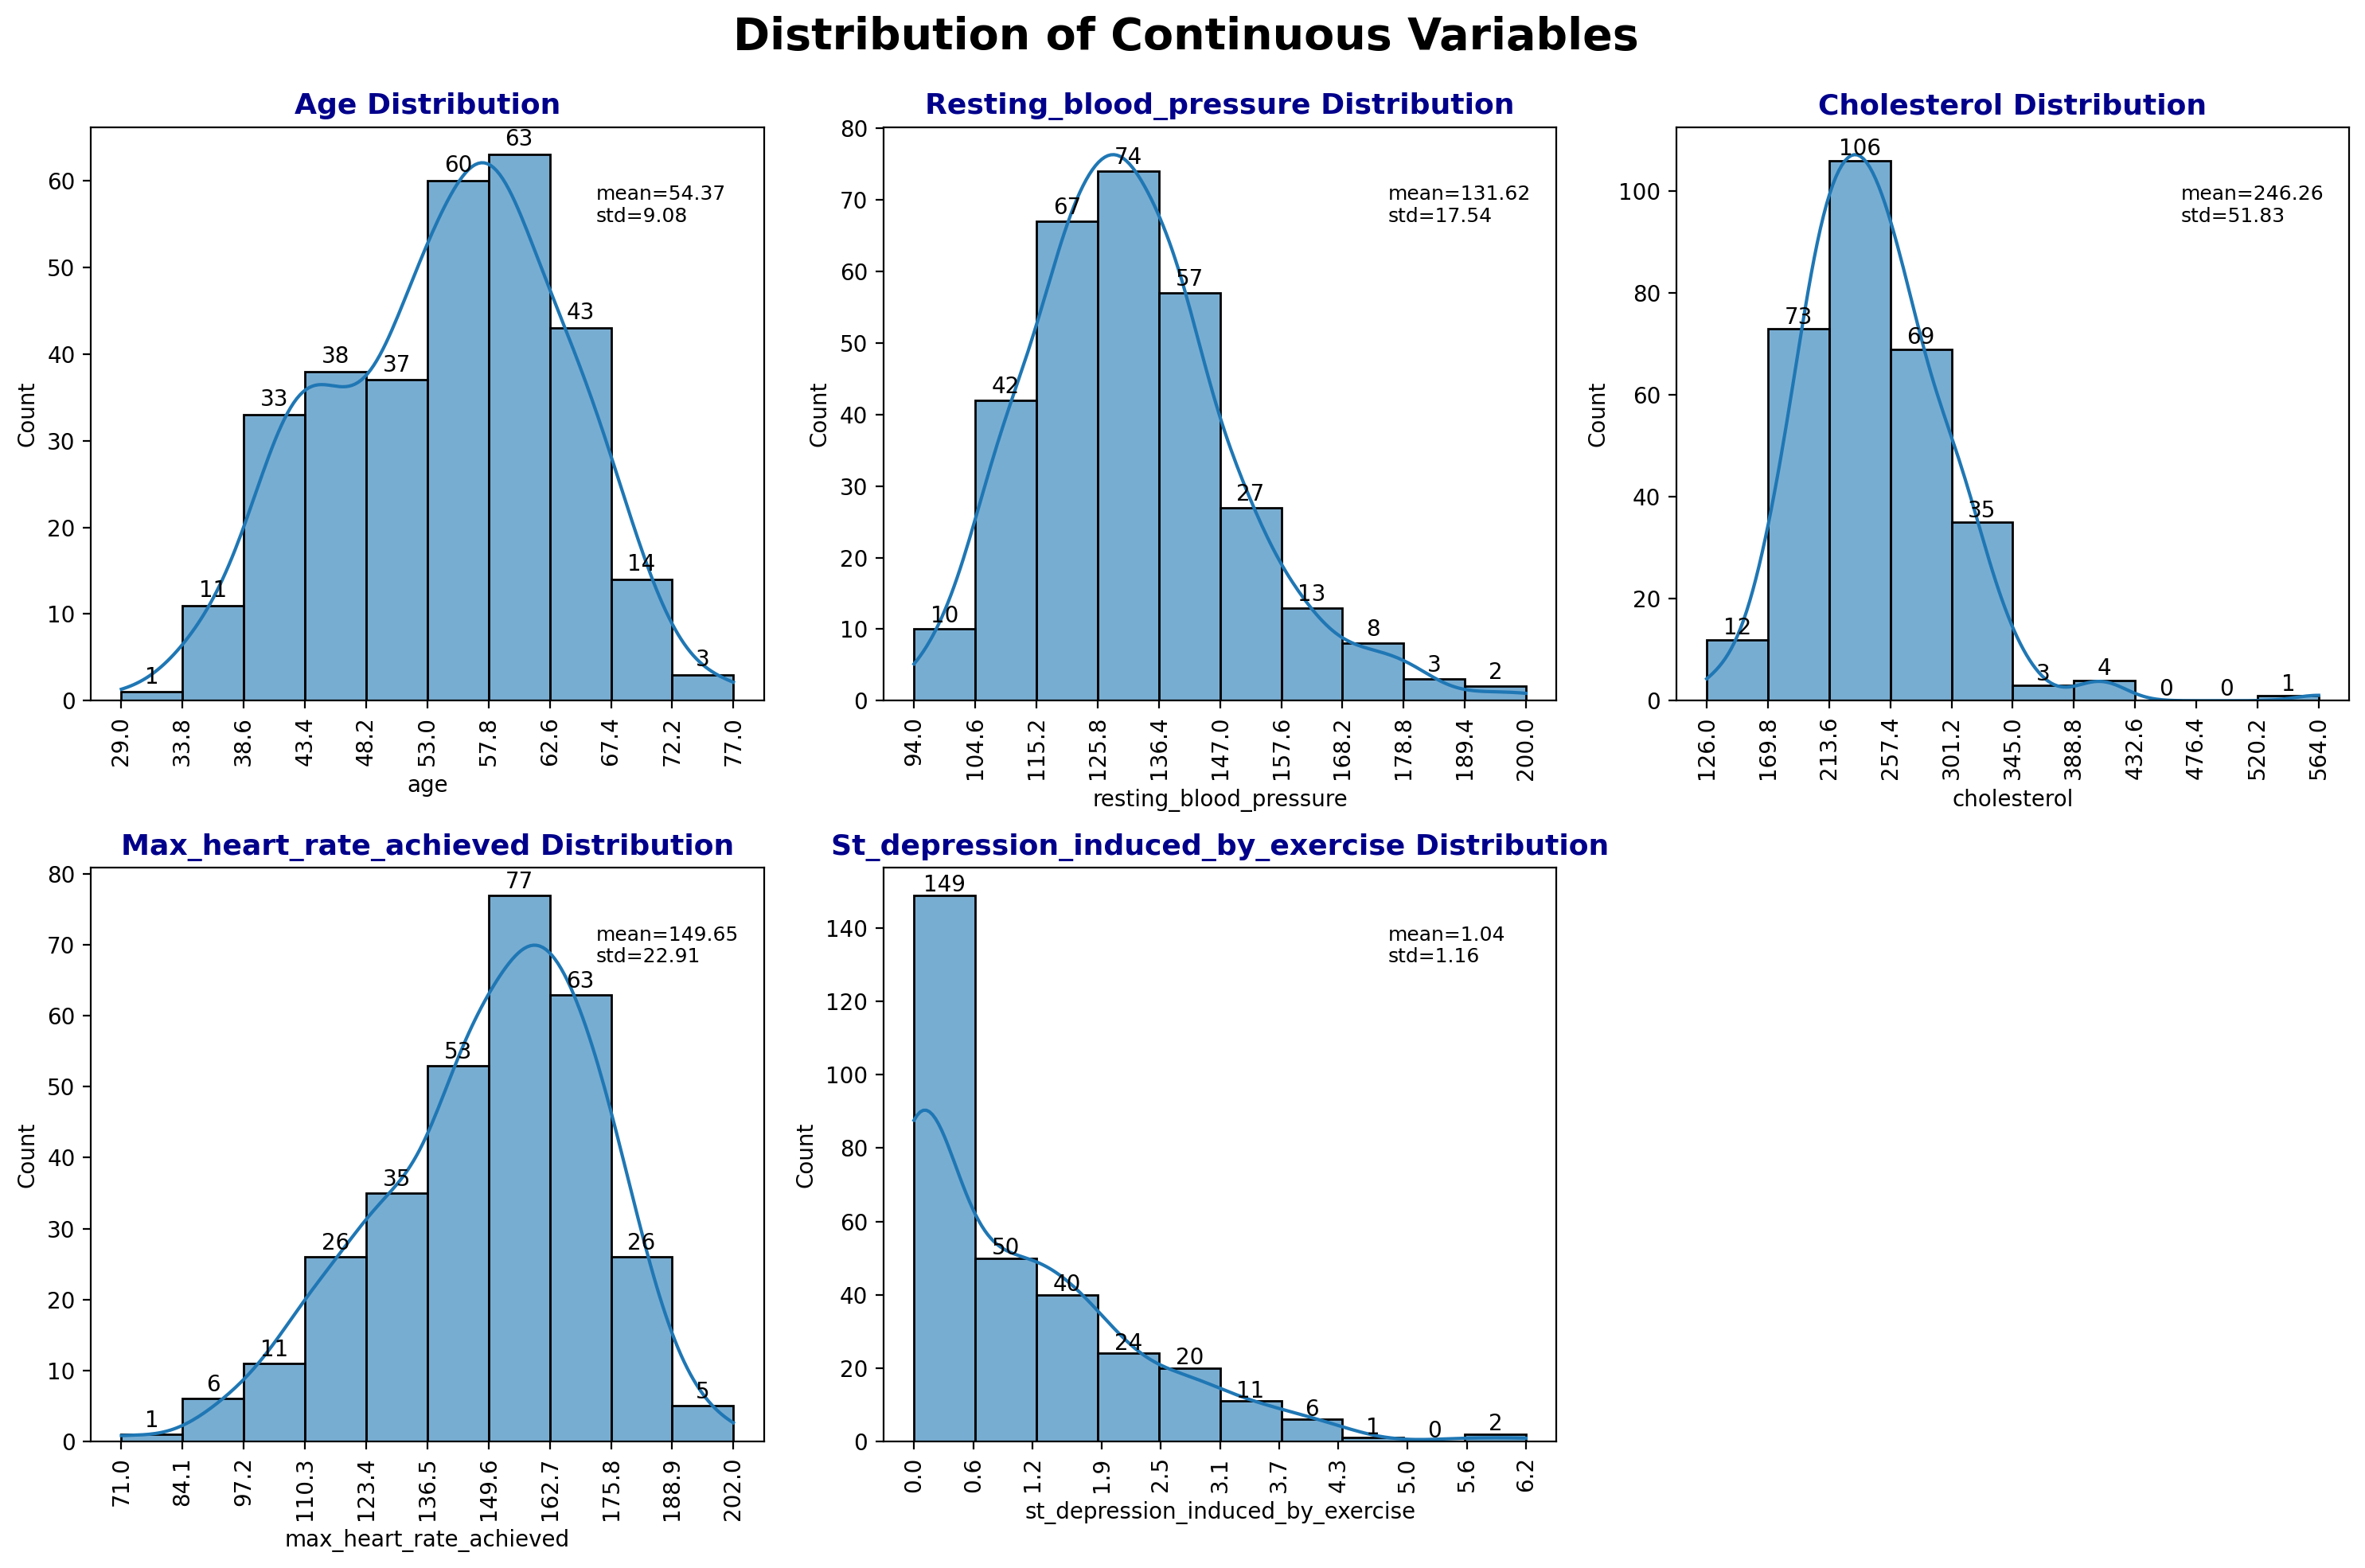

In [ ]:
# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(numerical):
    x = i // 3
    y = i % 3
    #values, bin_edges = np.histogram(df[col],
     #                                range=(np.floor(df[col].min()), np.ceil(df[col].max())))
    values, bin_edges = np.histogram(df[col], range=(df[col].min(), df[col].max()))


    graph = sns.histplot(data=df, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                          alpha=0.6)
    ax[x, y].set_xlabel(col)
    ax[x, y].set_ylabel('Count')
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(),rotation=90)
    ax[x, y].set_title(f'{str(col).capitalize()} Distribution', fontsize=13, color='darkblue', fontweight='bold')
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10)

    textstr = '\n'.join((
        r'mean=%.2f' % df[col].mean(),
        r'std=%.2f' % df[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=9, verticalalignment='top',
                  color='black')

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.91)
plt.show()


# **UNIVARIATE ANALYSIS FOR CATEGORICAL DATA**

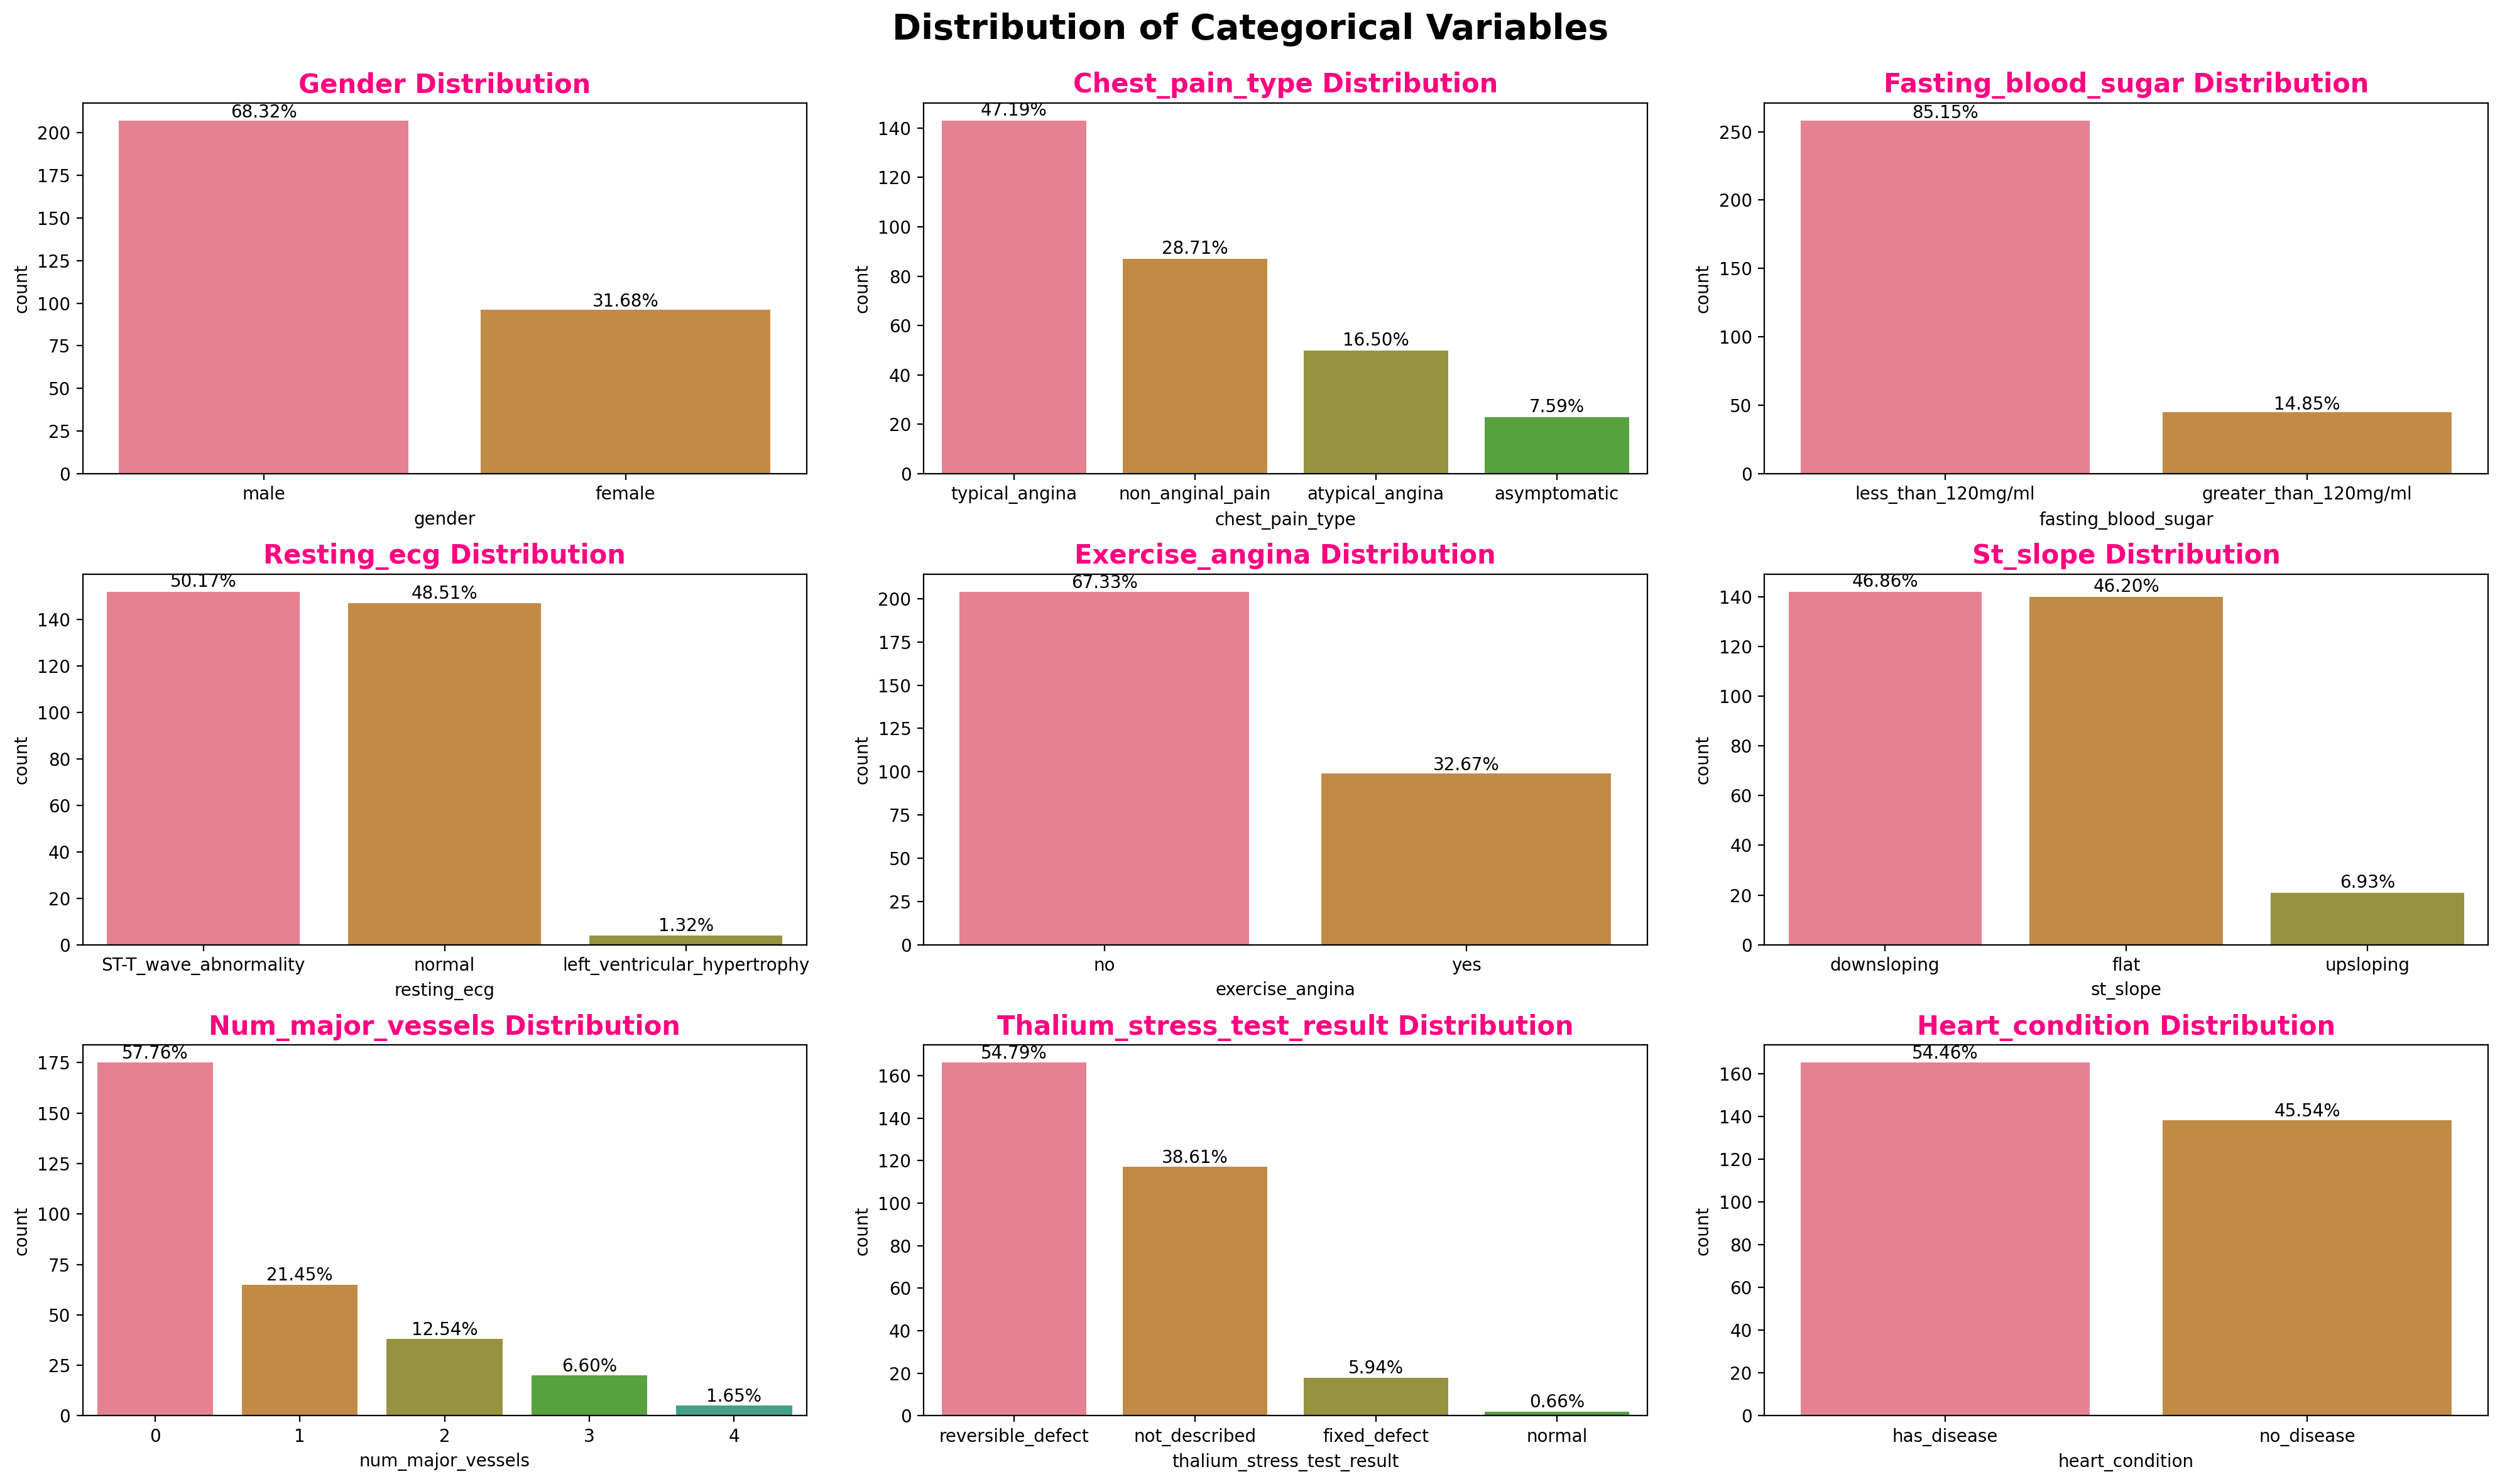

In [ ]:

# Set up the subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Define a sequential color palette
custom_palette = sns.color_palette("husl", n_colors=len(categorical))

# Plot categorical variables
for i, col in enumerate(categorical):
    x = i // 3
    y = i % 3
    sns.countplot(x=col,
                  data=df,
                  palette=custom_palette,
                  ax=axes[x, y],
                  order=df[col].value_counts().index)

    total = float(len(df[col]))
    axes[x, y].set_title(f'{str(col).capitalize()} Distribution', fontsize=15, color=(1.0, 0.0, 0.5), fontweight='bold')

    # Add percentage labels
    for p in axes[x, y].patches:
        height = p.get_height()
        axes[x, y].text(p.get_x() + p.get_width() / 2.,
                        height + 2,
                        '{:1.2f}%'.format((height / total) * 100),
                        ha='center')

plt.tight_layout()
plt.suptitle('Distribution of Categorical Variables', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.92)

plt.show()


# **BIVARIATE ANALYSIS FOR NUMERICAL DATA**

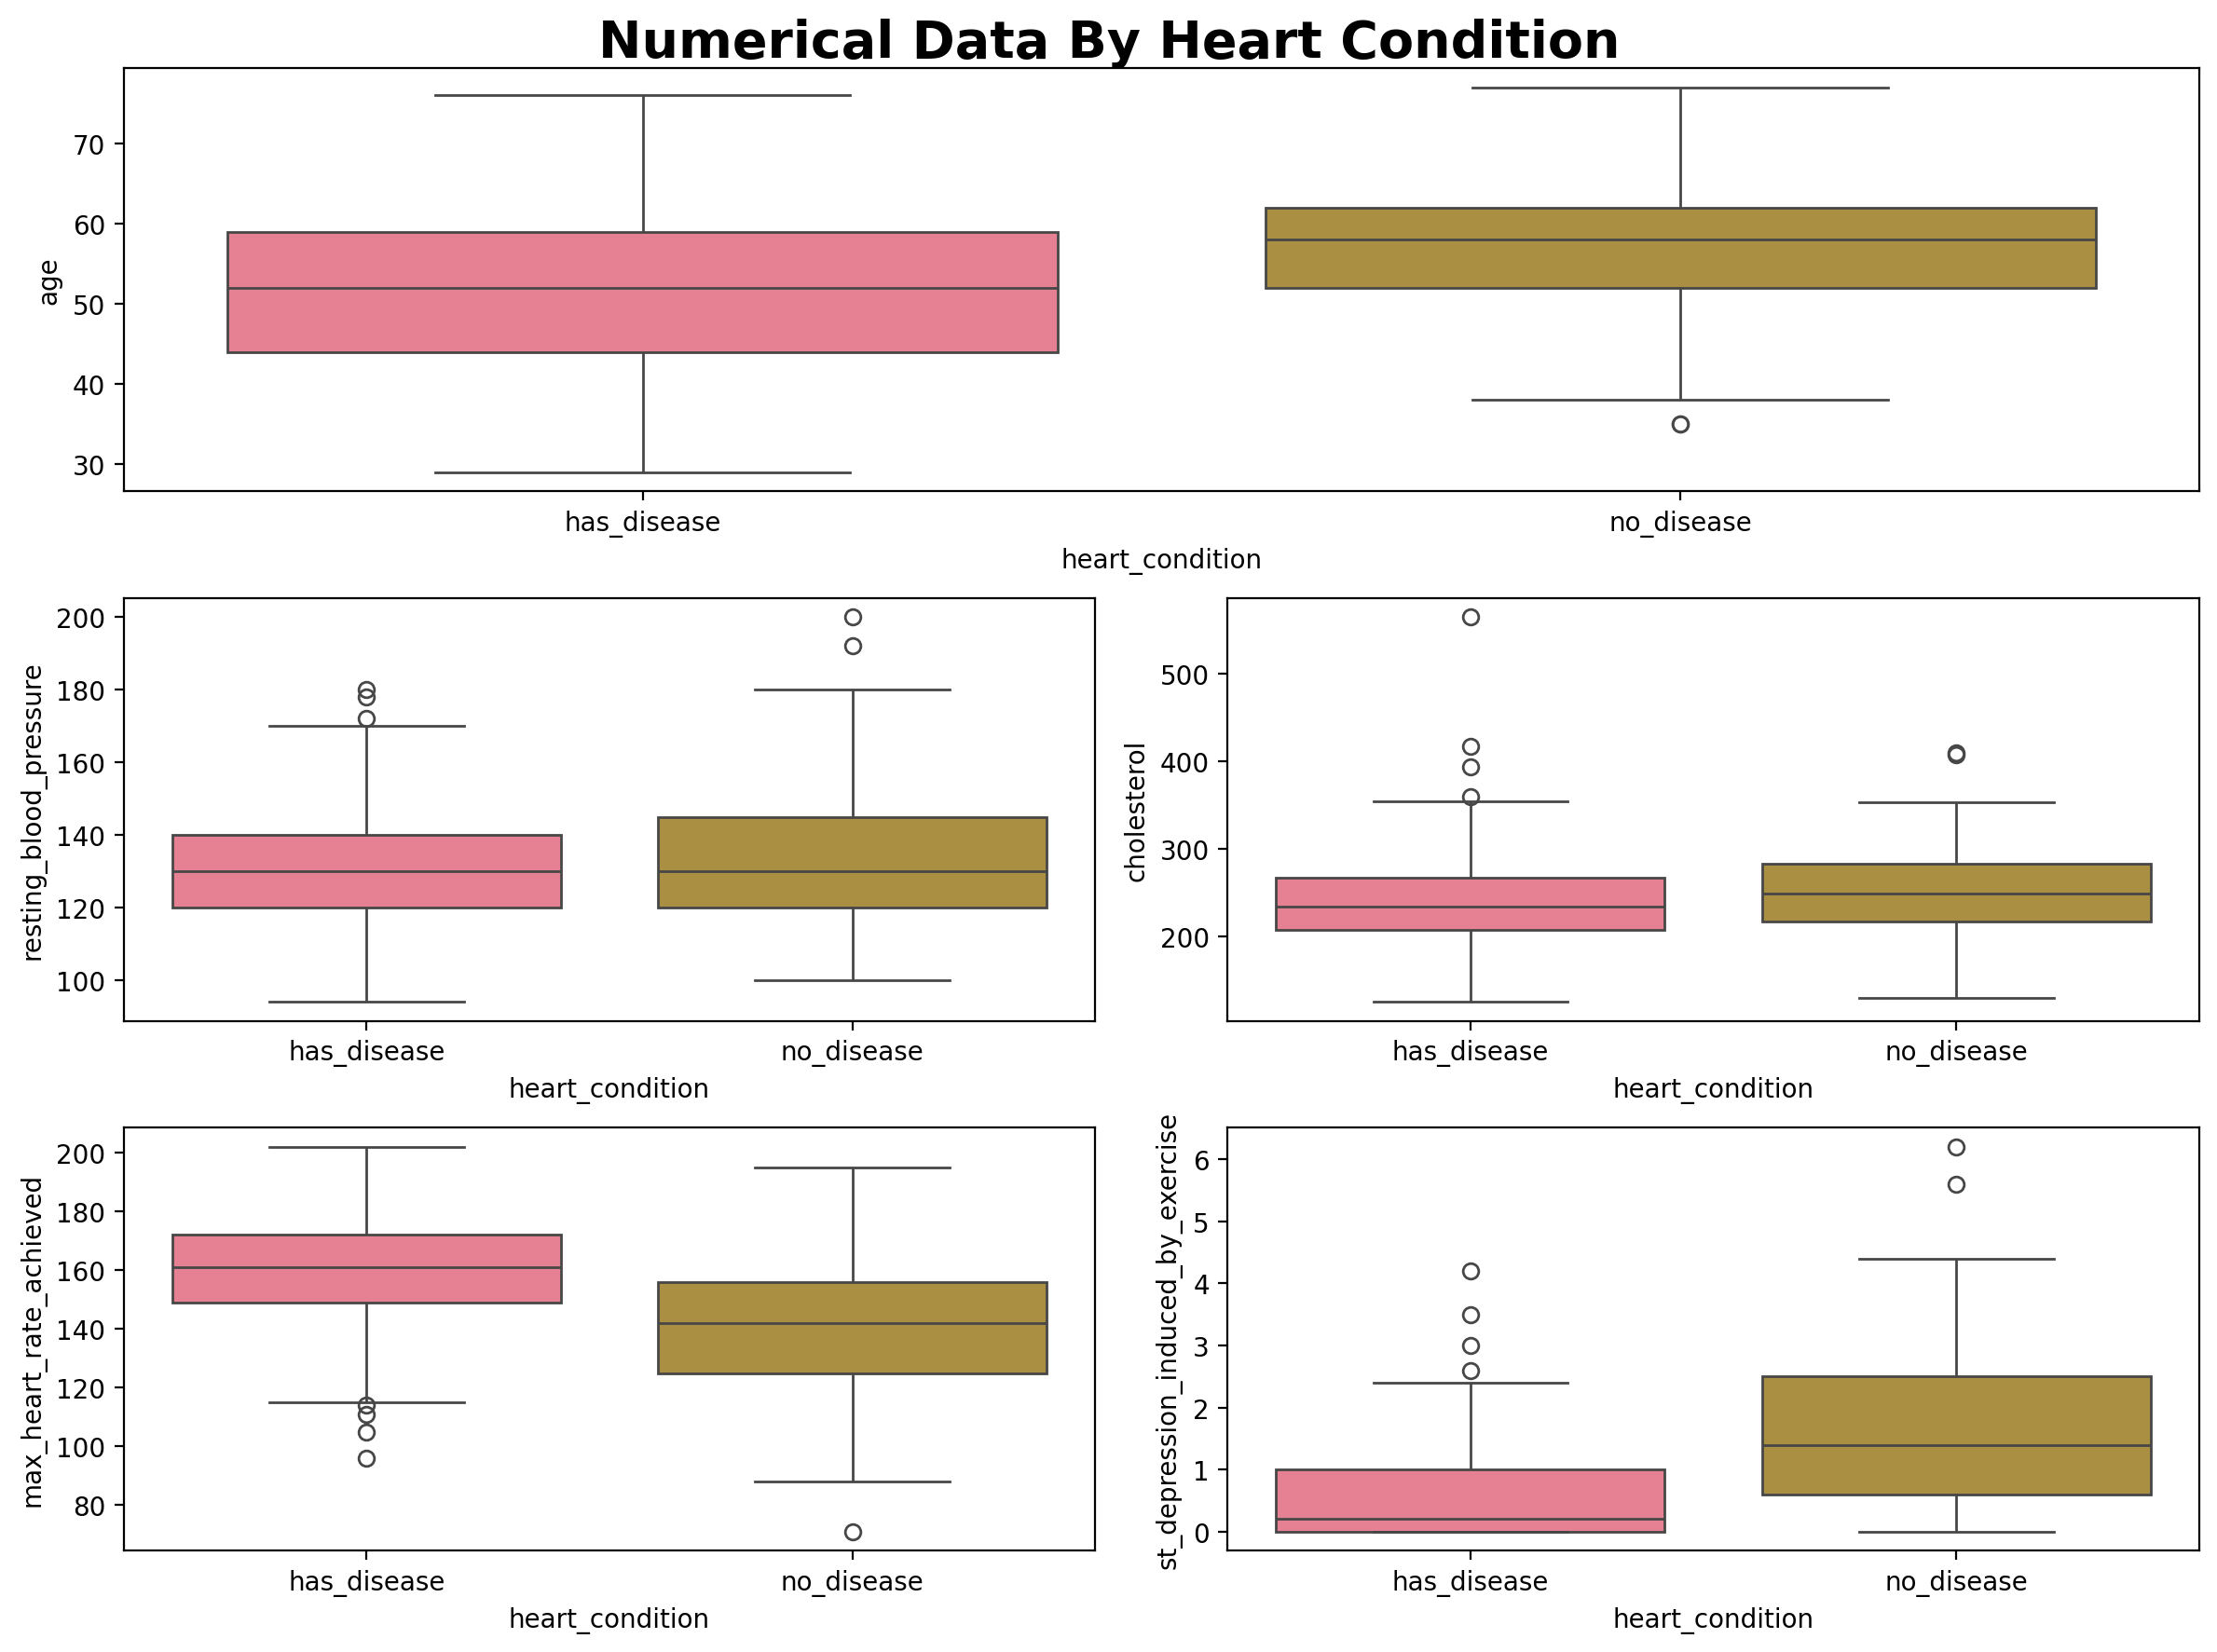

In [ ]:
# Define custom palette
custom_palette = sns.color_palette("husl")

# Displaying numeric distribution vs condition:
fig = plt.figure(constrained_layout=True, figsize=(12, 9))
grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)

# Plot age distribution first
ax1 = fig.add_subplot(grid[0, :])
sns.boxplot(x='heart_condition', y='age', data=df, ax=ax1, palette=custom_palette)

# Plot other distributions
ax2 = fig.add_subplot(grid[1, :2])
sns.boxplot(x='heart_condition', y='resting_blood_pressure', data=df, ax=ax2, palette=custom_palette)

ax3 = fig.add_subplot(grid[1, 2:])
sns.boxplot(x='heart_condition', y='cholesterol', data=df, ax=ax3, palette=custom_palette)

ax4 = fig.add_subplot(grid[2, :2])
sns.boxplot(x='heart_condition', y='max_heart_rate_achieved', data=df, ax=ax4, palette=custom_palette)

ax5 = fig.add_subplot(grid[2, 2:])
sns.boxplot(x='heart_condition', y='st_depression_induced_by_exercise', data=df, ax=ax5, palette=custom_palette)


plt.tight_layout()
plt.suptitle('Numerical Data By Heart Condition', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.95)
plt.show()


# **BIVARIATE ANALYSIS FOR CATEGORICAL DATA**

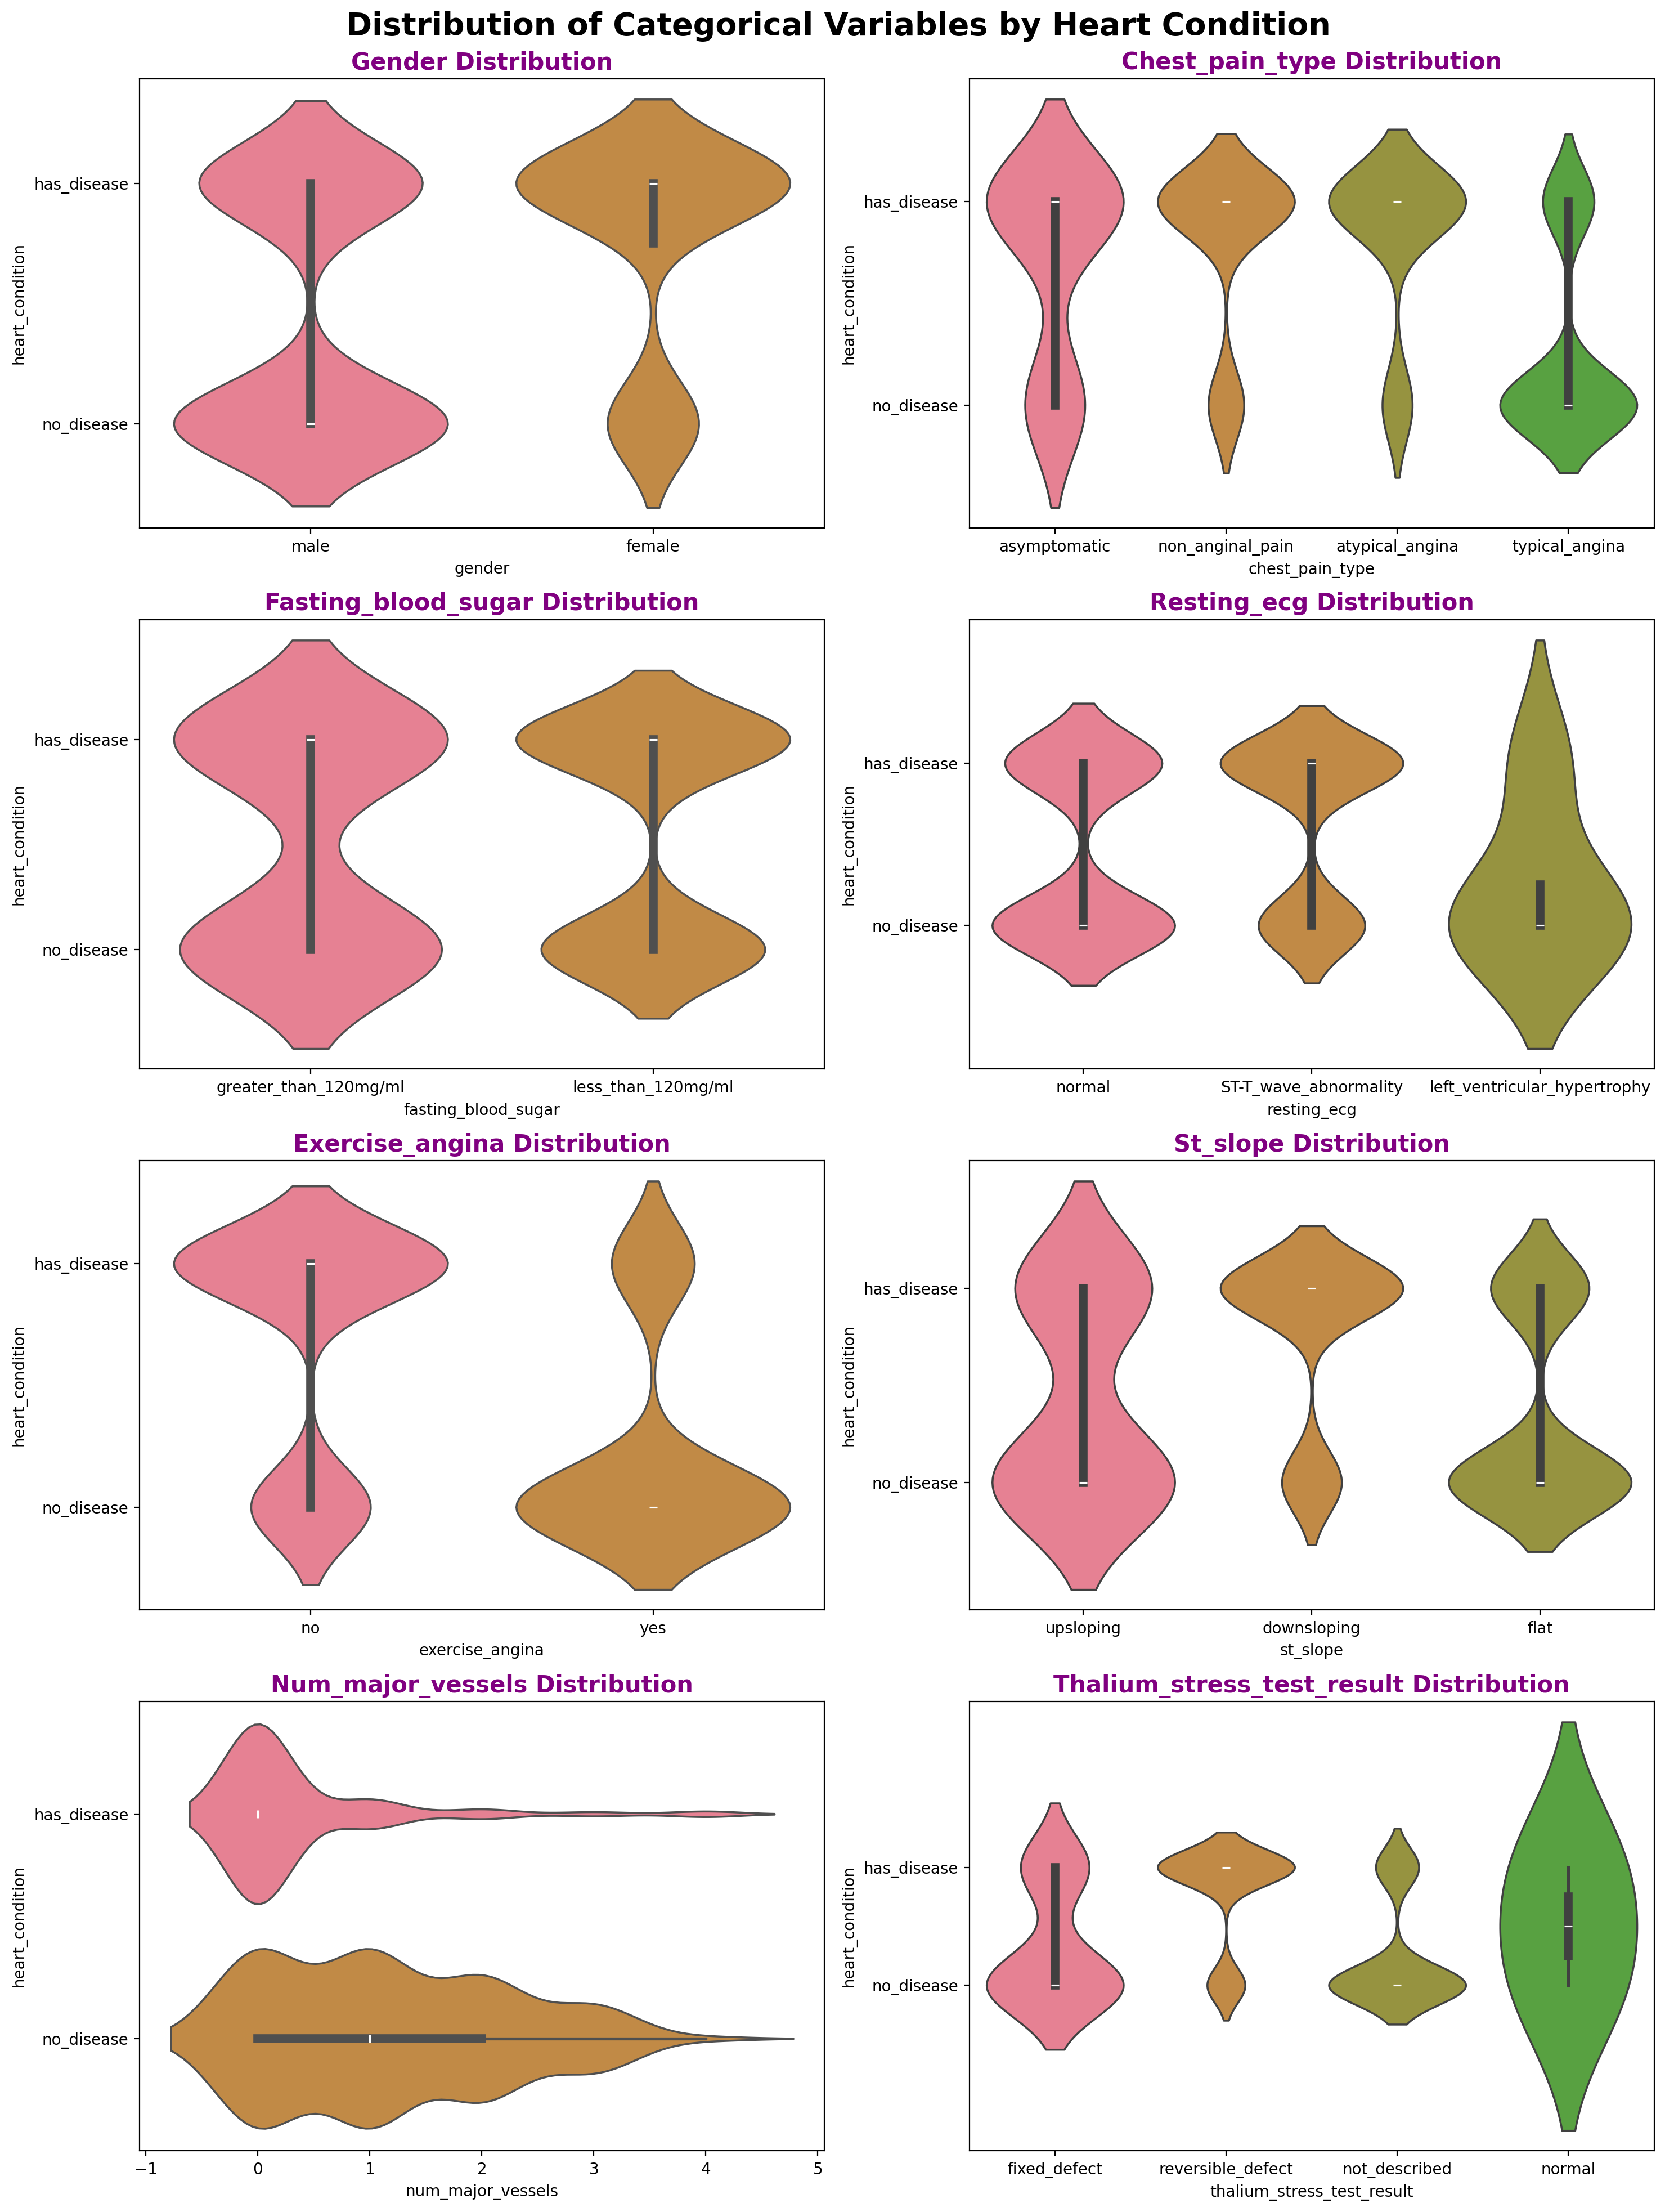

In [ ]:
# Set up the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  # Update the figsize to make room for 4 rows

# Define a sequential color palette
custom_palette = sns.color_palette("husl", n_colors=len(categorical))

# Plot categorical variables with violin plots
for i, col in enumerate(categorical[:-1]):  # Exclude the last categorical variable
    x = i // 2
    y = i % 2
    sns.violinplot(x=col,
                   y='heart_condition',  # Using 'heart_condition' as y to differentiate by color
                   data=df,
                   palette=custom_palette,
                   ax=axes[x, y])

    axes[x, y].set_title(f'{str(col).capitalize()} Distribution', fontsize=15, color='purple', fontweight='bold')

# Remove the last subplot
# fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.suptitle('Distribution of Categorical Variables by Heart Condition', fontsize=20, fontweight='bold')
plt.subplots_adjust(top=0.95)

plt.show()


# **DATA PREPROCESSING**

In [ ]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

In [ ]:
categorical

['gender',
 'chest_pain_type',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'st_slope',
 'num_major_vessels',
 'thalium_stress_test_result',
 'heart_condition']

In [ ]:
numerical

['age',
 'resting_blood_pressure',
 'cholesterol',
 'max_heart_rate_achieved',
 'st_depression_induced_by_exercise']

In [ ]:
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numerical] < (Q1 - 1.5 * IQR)) | (df[numerical] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age                                  0
resting_blood_pressure               9
cholesterol                          5
max_heart_rate_achieved              1
st_depression_induced_by_exercise    5
dtype: int64

In [ ]:
df.head()

age  gender   chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    male      asymptomatic                     145          233   
1   37    male  non_anginal_pain                     130          250   
2   41  female   atypical_angina                     130          204   
3   56    male   atypical_angina                     120          236   
4   57  female    typical_angina                     120          354   

     fasting_blood_sugar            resting_ecg  max_heart_rate_achieved  \
0  greater_than_120mg/ml                 normal                      150   
1     less_than_120mg/ml  ST-T_wave_abnormality                      187   
2     less_than_120mg/ml                 normal                      172   
3     less_than_120mg/ml  ST-T_wave_abnormality                      178   
4     less_than_120mg/ml  ST-T_wave_abnormality                      163   

  exercise_angina  st_depression_induced_by_exercise     st_slope  \
0              no                                2.3    upsloping   
1              no                                3.5    upsloping   
2              no                                1.4  downsloping   
3              no                                0.8  downsloping   
4             yes                                0.6  downsloping   

   num_major_vessels thalium_stress_test_result heart_condition  
0                  0               fixed_defect     has_disease  
1                  0          reversible_defect     has_disease  
2                  0          reversible_defect     has_disease  
3                  0          reversible_defect     has_disease  
4                  0          reversible_defect     has_disease

Performs data preparation and splitting for machine learning analysis of heart disease prediction.

This function takes a pandas DataFrame containing heart disease data and splits it into training and testing sets for further analysis.

Steps:
    1. Defines a list `remaining_categorical` specifying categorical features for one-hot encoding.
    2. Performs one-hot encoding for the listed categorical features using `pd.get_dummies`.
    3. Splits the encoded DataFrame (`df_encoded`) into features (`X`) and target variable (`y`).
    4. Splits the features (`X`) and target variable (`y`) into training and testing sets using `train_test_split` with a 20% test size and random state set to 42.
    5. Prints the shapes of the training and testing sets for verification.
"""


In [ ]:
# Specify the remaining categorical features for one-hot encoding
remaining_categorical = ['gender', 'fasting_blood_sugar', 'exercise_angina', 'st_slope', 'num_major_vessels', 'chest_pain_type', 'resting_ecg', 'thalium_stress_test_result']

# Perform one-hot encoding for the remaining categorical features
df_encoded = pd.get_dummies(df, columns=remaining_categorical, drop_first=True)

# Split the data into features (X) and target (y)
X = df_encoded.drop('heart_condition', axis=1)
y = df_encoded['heart_condition']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (242, 22)
X_test shape: (61, 22)
y_train shape: (242,)
y_test shape: (61,)


# **Model Building and Evaluation**

Evaluates and compares the performance of Decision Tree, Random Forest, and Gradient Boosting Classifiers for heart disease prediction.

This script performs the following steps:

1. **Trains a Decision Tree Classifier:**
    * Instantiates a `DecisionTreeClassifier` with a random state set to 42 for reproducibility.
    * Fits the model on the training data (`X_train`, `y_train`).
    * Evaluates the model's performance on both training and testing sets using accuracy score and classification report.

2. **Prunes the Decision Tree:**
    * Creates a new `DecisionTreeClassifier` with a limited maximum depth (e.g., 5) to reduce complexity.
    * Fits the pruned model on the training data.
    * Evaluates the pruned model's performance on both training and testing sets using accuracy score and classification report.

3. **Trains a Random Forest Classifier:**
    * Instantiates a `RandomForestClassifier` with a random state set to 42.
    * Fits the model on the training data.
    * Evaluates the model's performance on both training and testing sets using accuracy score and classification report.

4. **Trains a Gradient Boosting Classifier:**
    * Instantiates a `GradientBoostingClassifier` with a random state set to 42.
    * Fits the model on the training data.
    * Evaluates the model's performance on both training and testing sets using accuracy score and classification report.

This approach allows for comparing the performance of these three ensemble learning algorithms for the heart disease prediction task.

**Note:** This script assumes the data preprocessing and train-test split have already been performed and the variables `X_train`, `X_test`, `y_train`, and `y_test` are available.

# **Decision Tree Classifier**

In [ ]:
# Step 3: Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 4: Evaluate the Decision Tree Classifier
y_pred_train = decision_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

y_pred_test = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)

# Step 5: Display classification report for the testing set
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 1.0
Testing Accuracy: 0.7540983606557377
Classification Report:
              precision    recall  f1-score   support

 has_disease       0.81      0.69      0.75        32
  no_disease       0.71      0.83      0.76        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



# **Hyperparameter Tuning**

In [ ]:
# Define the hyperparameter grid
param_grid = {
  'max_depth': [3, 5, 7],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the tuned model on the test set
tuned_model = grid_search.best_estimator_
tuned_model.fit(X_train, y_train)
test_accuracy = tuned_model.score(X_test, y_test)
print("Testing Accuracy (Tuned Model):", test_accuracy)


# Use the tuned model to make predictions on the test data
y_pred_test_tuned = tuned_model.predict(X_test)

# Evaluate the performance of the tuned model
test_accuracy_tuned = accuracy_score(y_test, y_pred_test_tuned)
print("Testing Accuracy (Tuned Model):", test_accuracy_tuned)

# Display classification report for the testing set with tuned model
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_test_tuned))

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Testing Accuracy (Tuned Model): 0.7868852459016393
Testing Accuracy (Tuned Model): 0.7868852459016393
Classification Report (Tuned Model):
              precision    recall  f1-score   support

 has_disease       0.85      0.72      0.78        32
  no_disease       0.74      0.86      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [ ]:
# Step 3: Train the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Step 4: Evaluate the Decision Tree Classifier
y_pred_train = decision_tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

y_pred_test = decision_tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", test_accuracy)

# Step 5: Display classification report for the testing set
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 1.0
Testing Accuracy: 0.7540983606557377
Classification Report:
              precision    recall  f1-score   support

 has_disease       0.81      0.69      0.75        32
  no_disease       0.71      0.83      0.76        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



In [ ]:
# Pruning the Decision Tree by limiting the maximum depth
pruned_decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
pruned_decision_tree.fit(X_train, y_train)

# Evaluate the pruned Decision Tree
pruned_train_accuracy = accuracy_score(y_train, pruned_decision_tree.predict(X_train))
print("Pruned Training Accuracy:", pruned_train_accuracy)

pruned_test_accuracy = accuracy_score(y_test, pruned_decision_tree.predict(X_test))
print("Pruned Testing Accuracy:", pruned_test_accuracy)

# Display classification report for the testing set
print("Pruned Decision Tree Classification Report:")
print(classification_report(y_test, pruned_decision_tree.predict(X_test)))



Pruned Training Accuracy: 0.9256198347107438
Pruned Testing Accuracy: 0.7704918032786885
Pruned Decision Tree Classification Report:
              precision    recall  f1-score   support

 has_disease       0.85      0.69      0.76        32
  no_disease       0.71      0.86      0.78        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



# **RandomForestClassifier**

In [ ]:
# Step 1: Instantiate the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Step 2: Train the Random Forest Classifier
random_forest.fit(X_train, y_train)

# Step 3: Evaluate the Random Forest Classifier
y_pred_train_rf = random_forest.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
print("Training Accuracy (Random Forest):", train_accuracy_rf)

y_pred_test_rf = random_forest.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)
print("Testing Accuracy (Random Forest):", test_accuracy_rf)

# Step 4: Display classification report for the testing set (Random Forest)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_test_rf))


Training Accuracy (Random Forest): 1.0
Testing Accuracy (Random Forest): 0.8360655737704918
Classification Report (Random Forest):
              precision    recall  f1-score   support

 has_disease       0.87      0.81      0.84        32
  no_disease       0.81      0.86      0.83        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# **GradientBoostingClassifier**

In [ ]:
# Step 1: Instantiate the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Step 2: Train the Gradient Boosting Classifier
gradient_boosting.fit(X_train, y_train)

# Step 3: Evaluate the Gradient Boosting Classifier
y_pred_train_gb = gradient_boosting.predict(X_train)
train_accuracy_gb = accuracy_score(y_train, y_pred_train_gb)
print("Training Accuracy (Gradient Boosting):", train_accuracy_gb)

y_pred_test_gb = gradient_boosting.predict(X_test)
test_accuracy_gb = accuracy_score(y_test, y_pred_test_gb)
print("Testing Accuracy (Gradient Boosting):", test_accuracy_gb)

# Step 4: Display classification report for the testing set
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_test_gb))


Training Accuracy (Gradient Boosting): 0.9958677685950413
Testing Accuracy (Gradient Boosting): 0.8524590163934426
Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

 has_disease       0.90      0.81      0.85        32
  no_disease       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



# **Visualization of Model Performance: Learning Curves and Feature Importance**
This script generates visualizations to analyze the performance of the trained machine learning models for heart disease prediction. It creates two types of plots for each model (Random Forest, Decision Tree, and Gradient Boosting):

Learning Curves: These plots depict the relationship between the training set size and the model's performance (training score and cross-validation score). They can reveal potential issues like underfitting or overfitting.
Feature Importance: These bar charts illustrate the relative importance of each feature in the model's prediction process. This helps identify the most influential features for heart disease prediction.
The script utilizes the following functions:

plot_learning_curve: This function takes a model estimator, features (X), target variable (y), and other parameters for cross-validation and training set sizes. It calculates and plots the learning curves for the model.
plot_feature_importance: This function takes a trained model estimator (estimator) and features (X). It extracts the feature importances from the model and creates a bar chart to visualize the relative importance of each feature.

<Figure size 2000x1200 with 0 Axes>

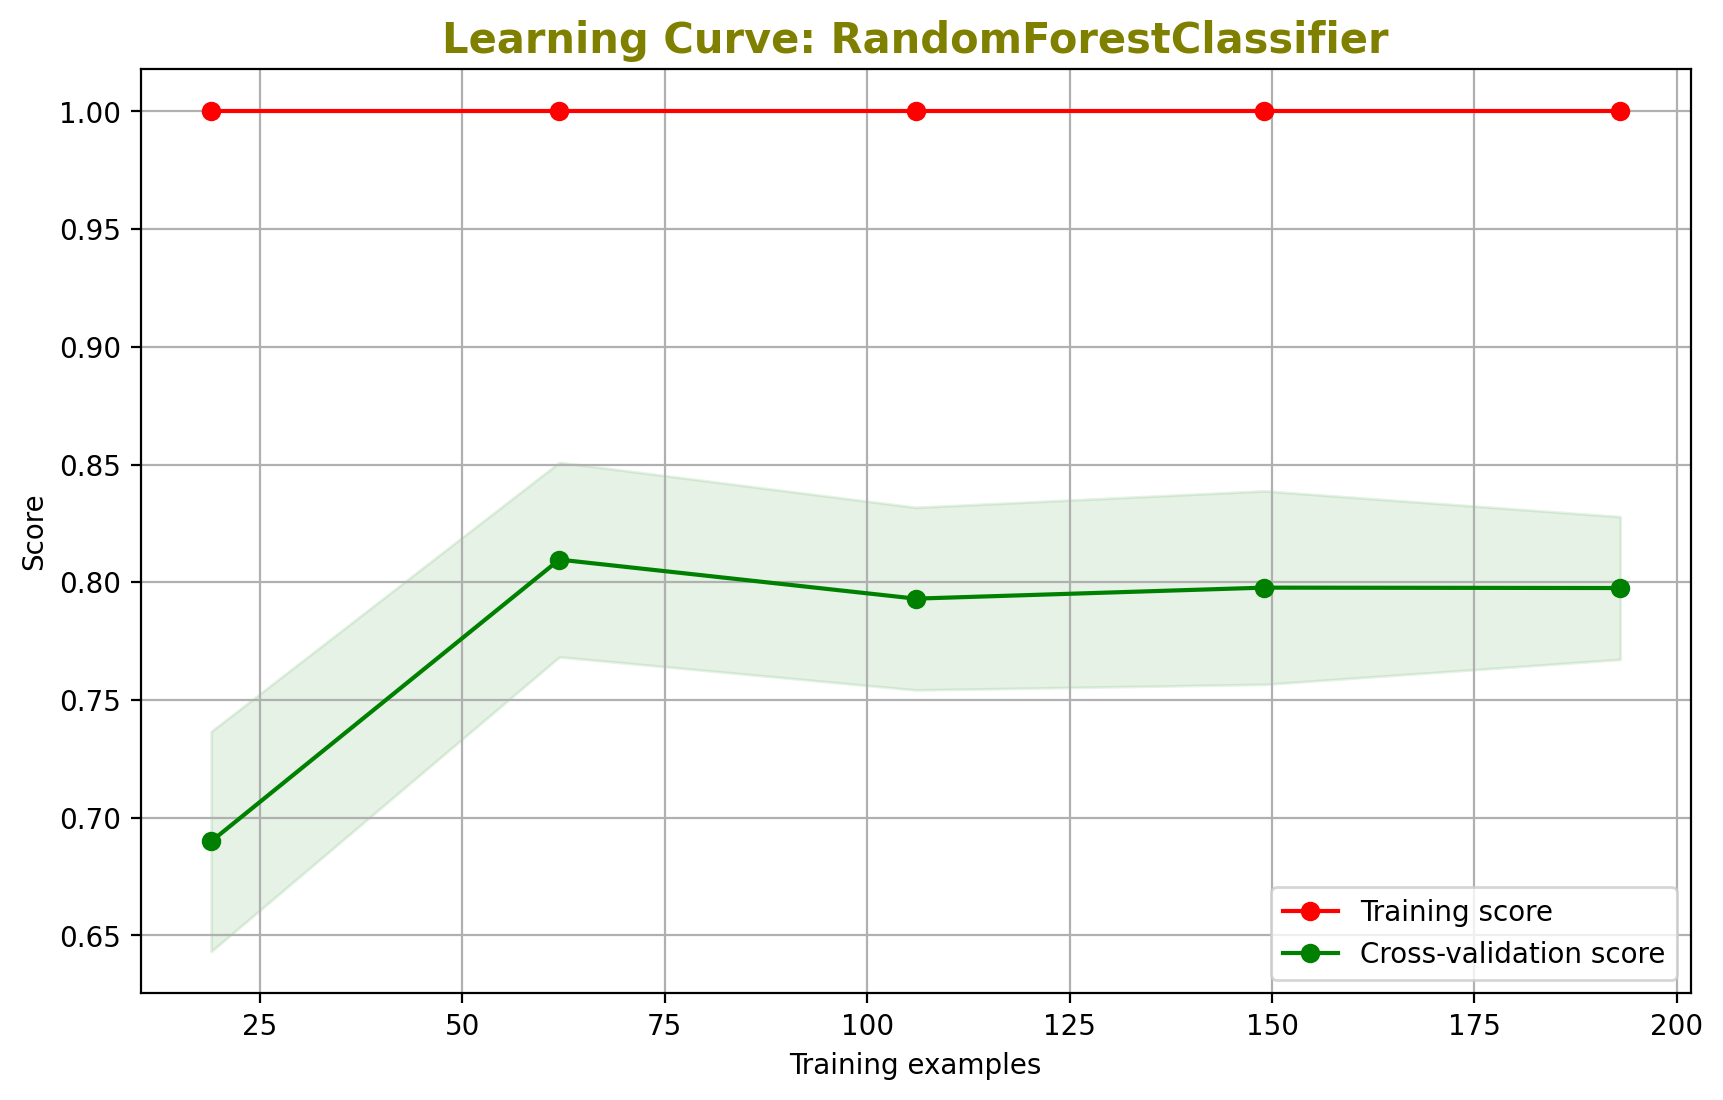

<Figure size 2000x1200 with 0 Axes>

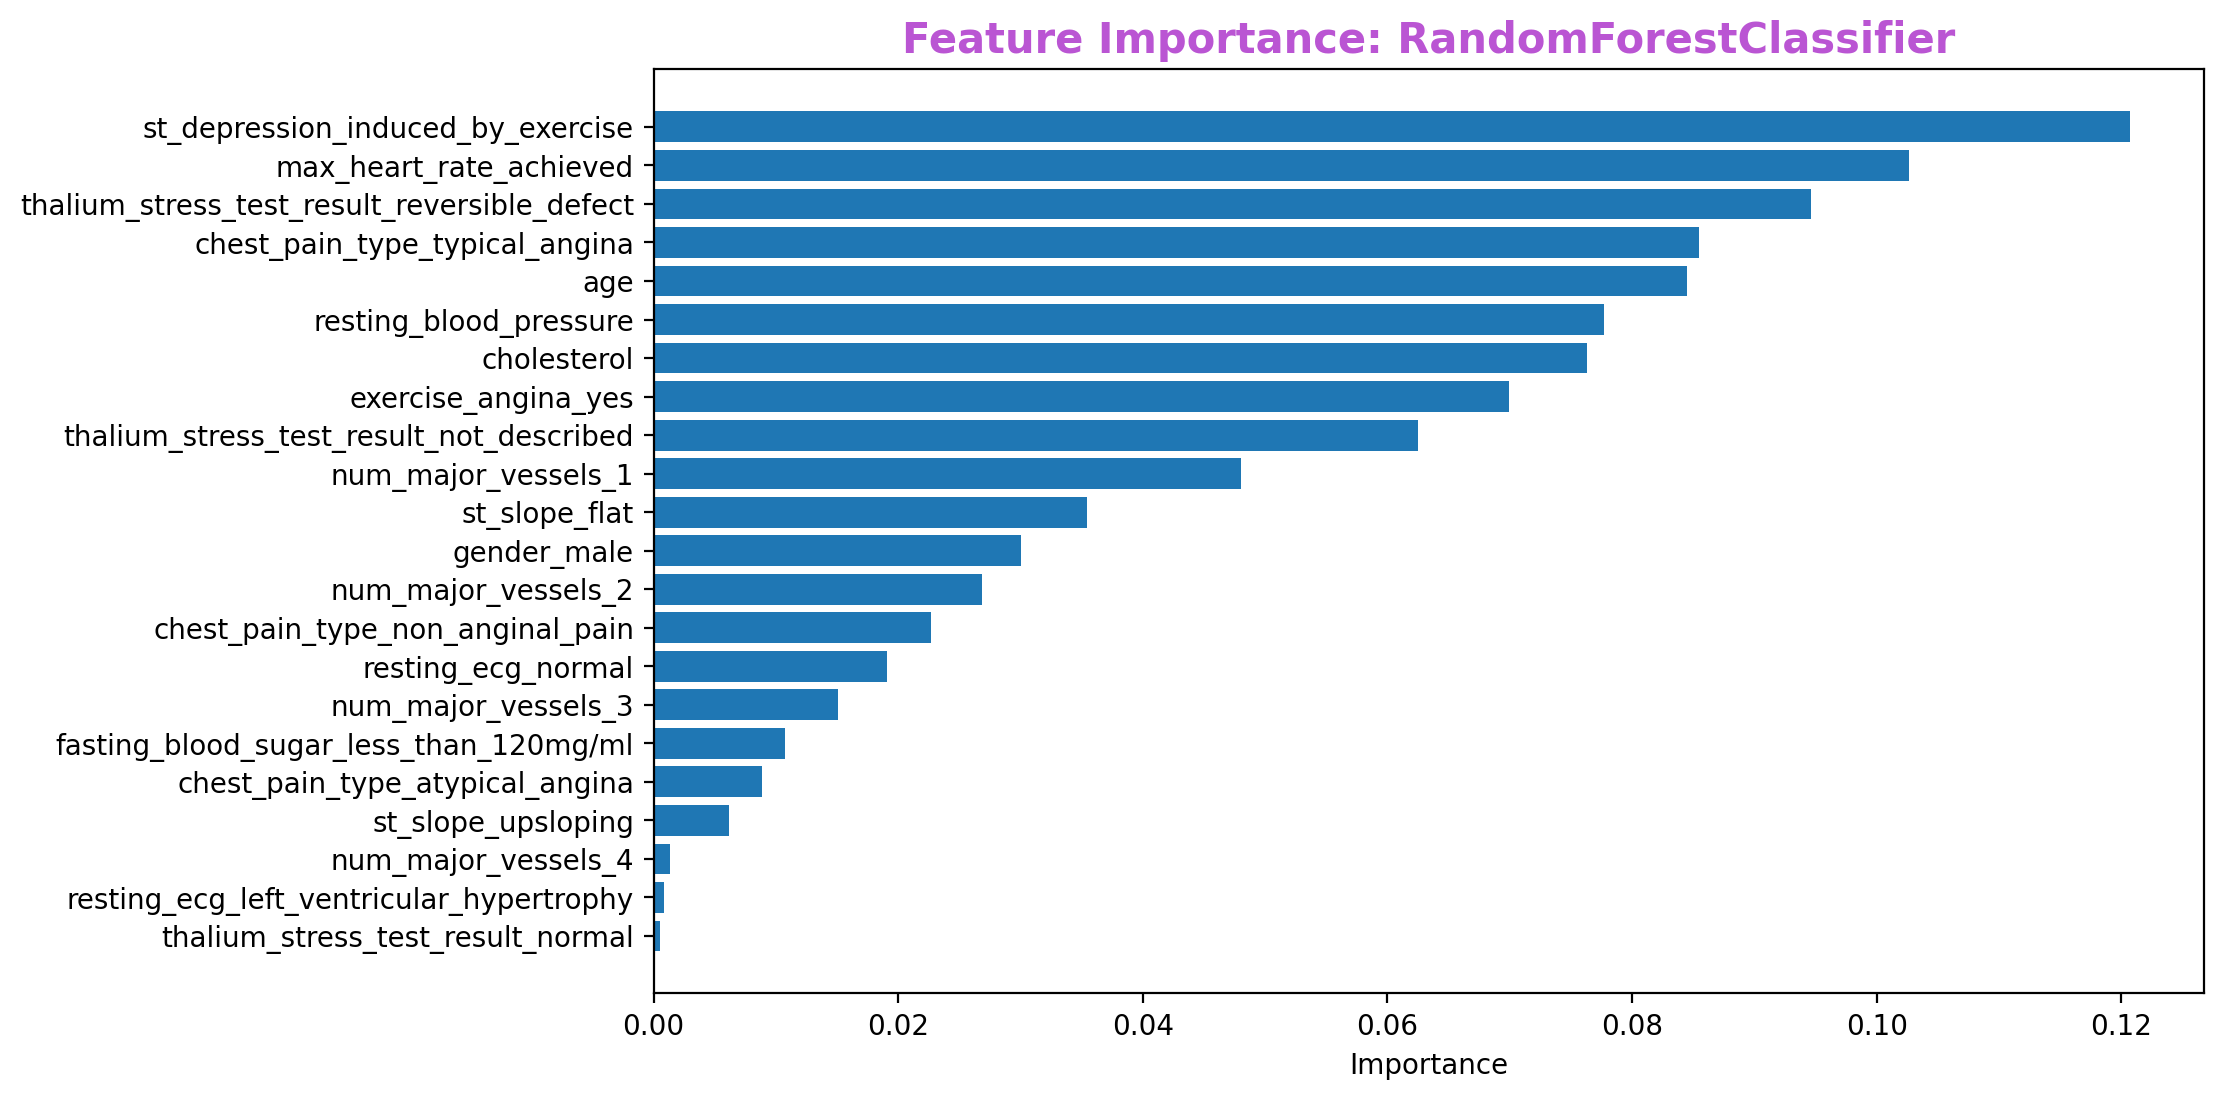

<Figure size 2000x1200 with 0 Axes>

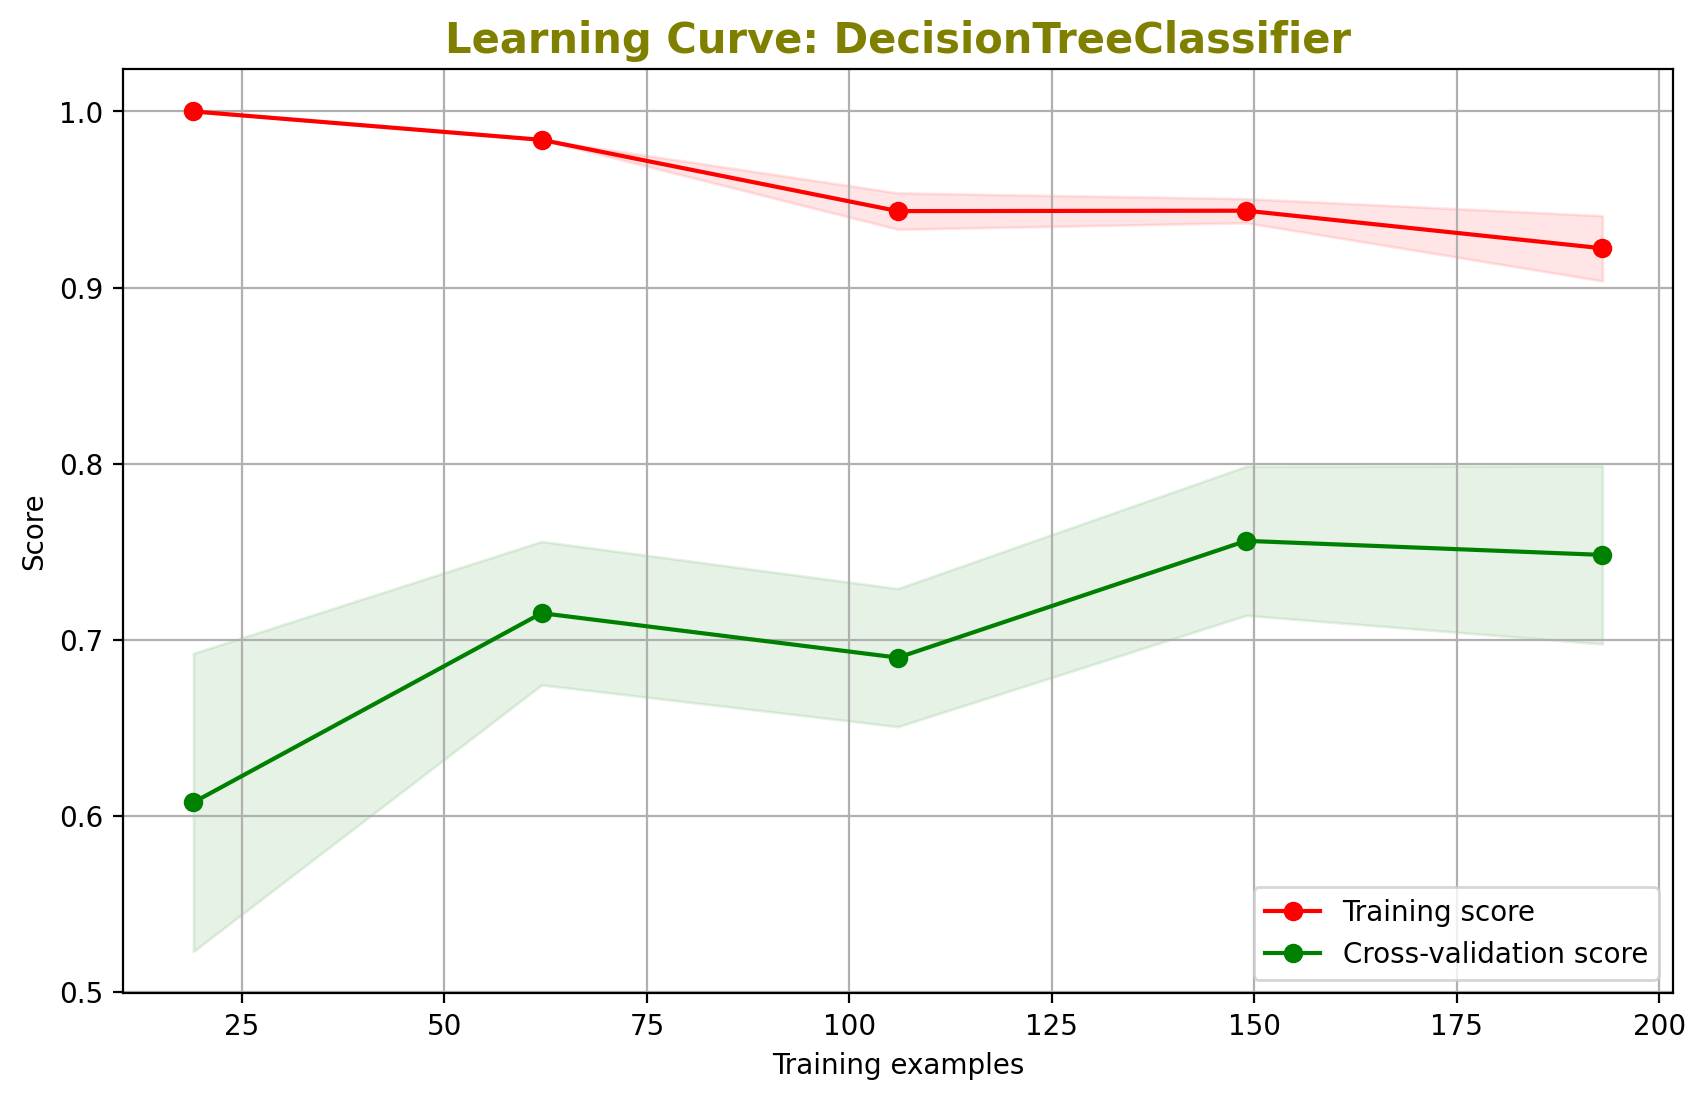

<Figure size 2000x1200 with 0 Axes>

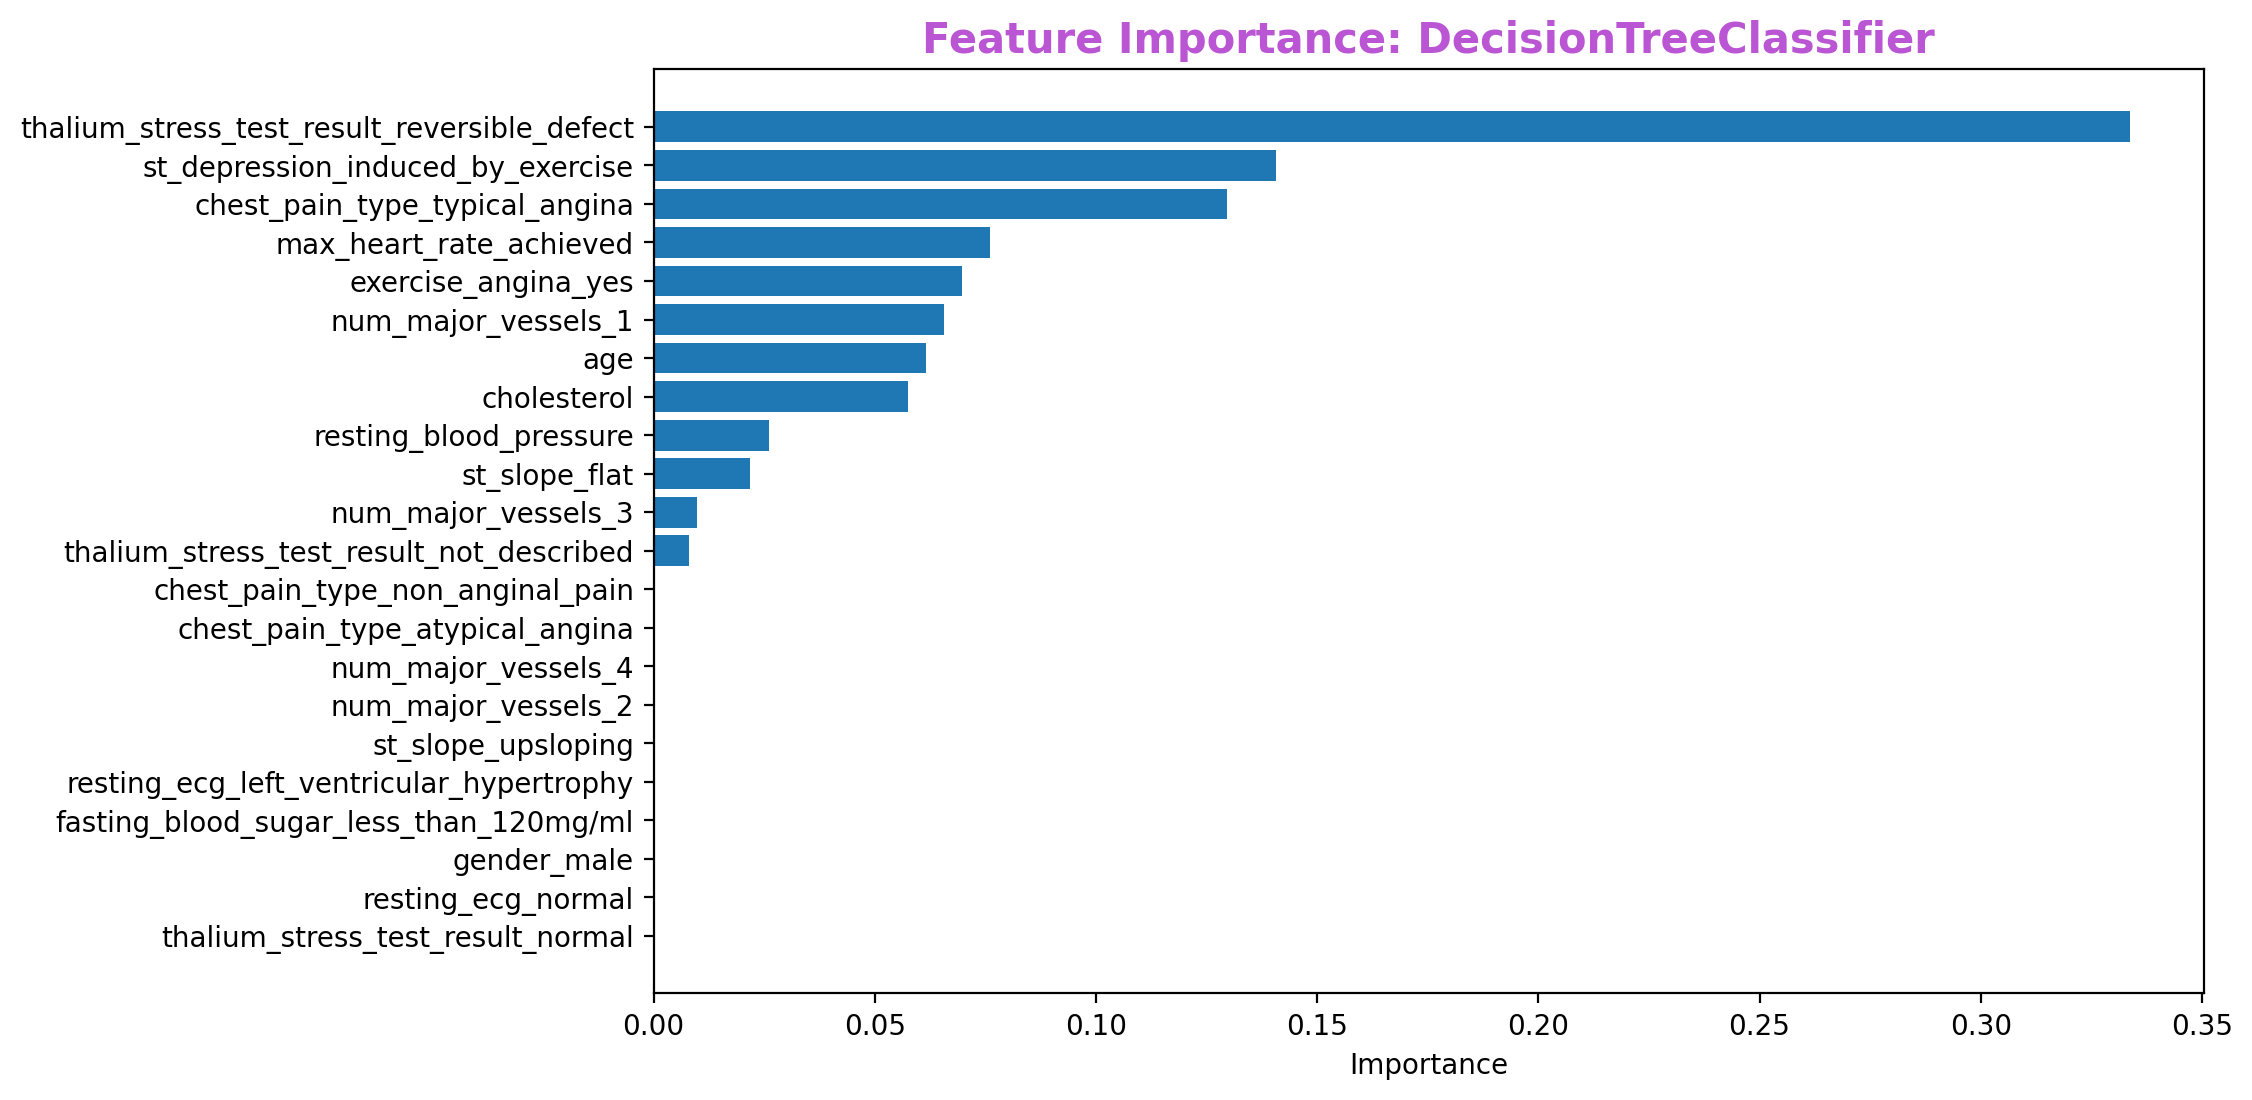

<Figure size 2000x1200 with 0 Axes>

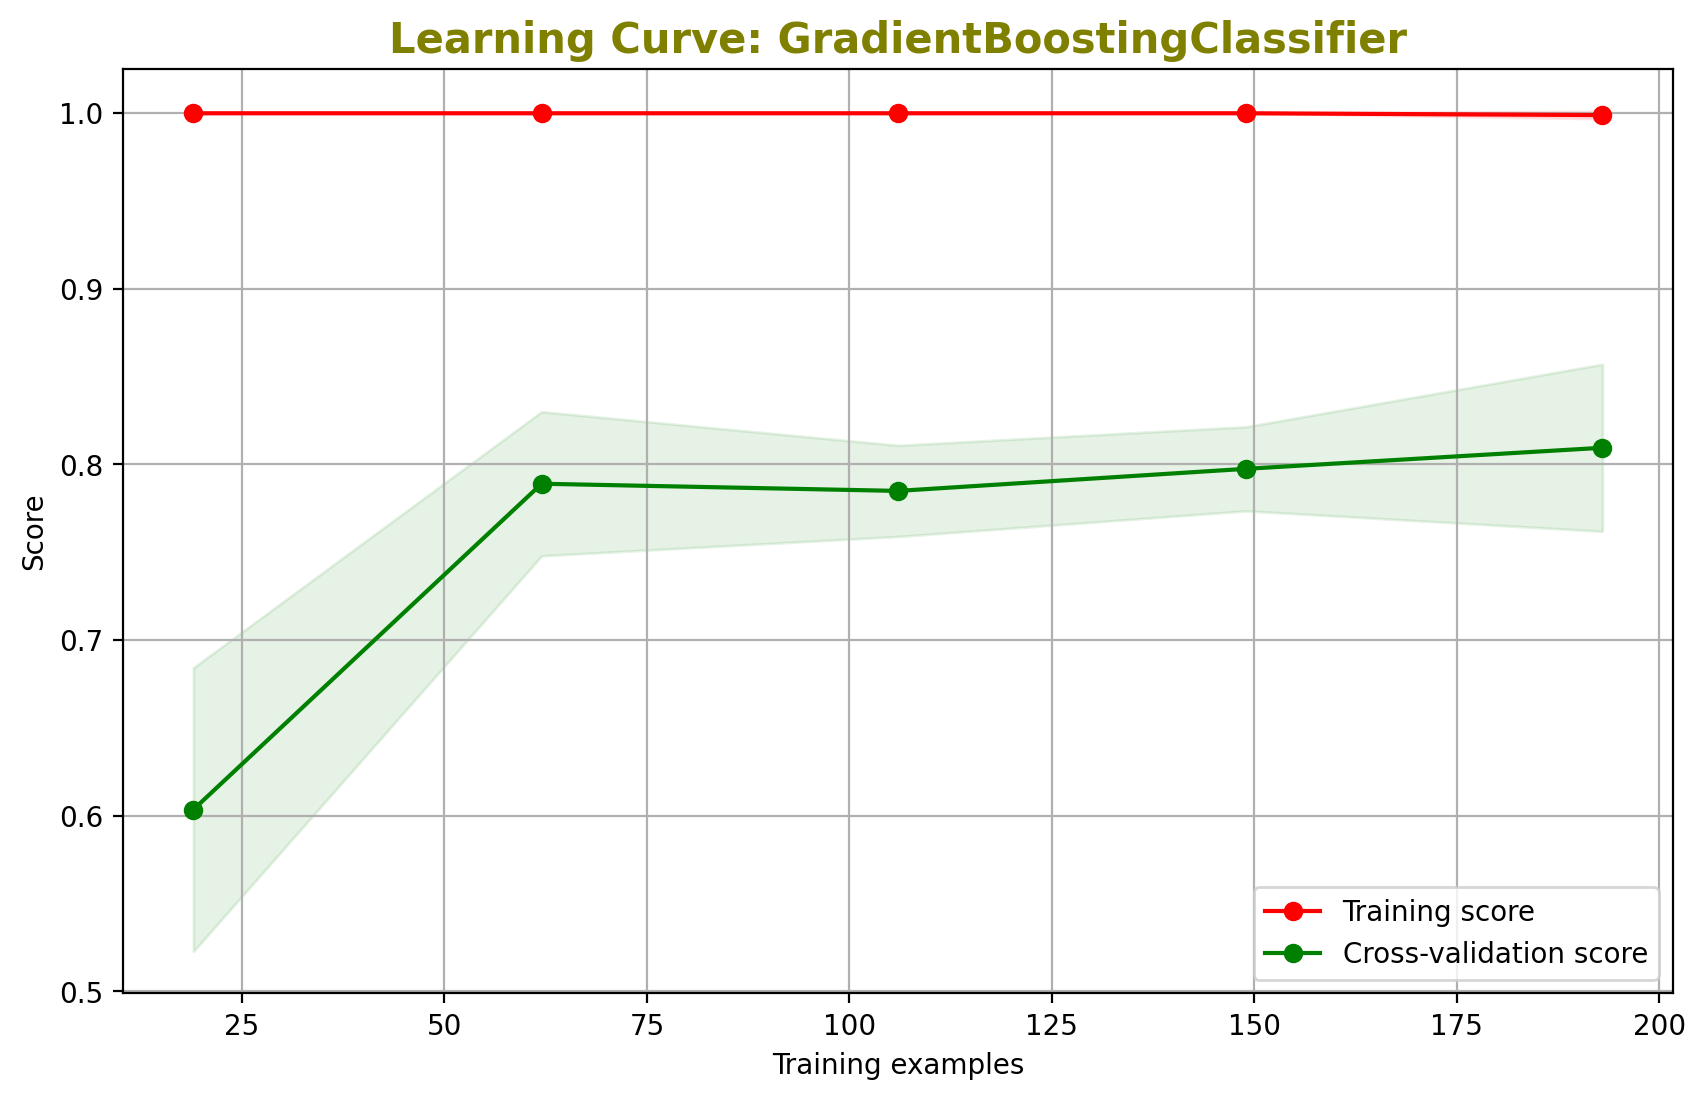

<Figure size 2000x1200 with 0 Axes>

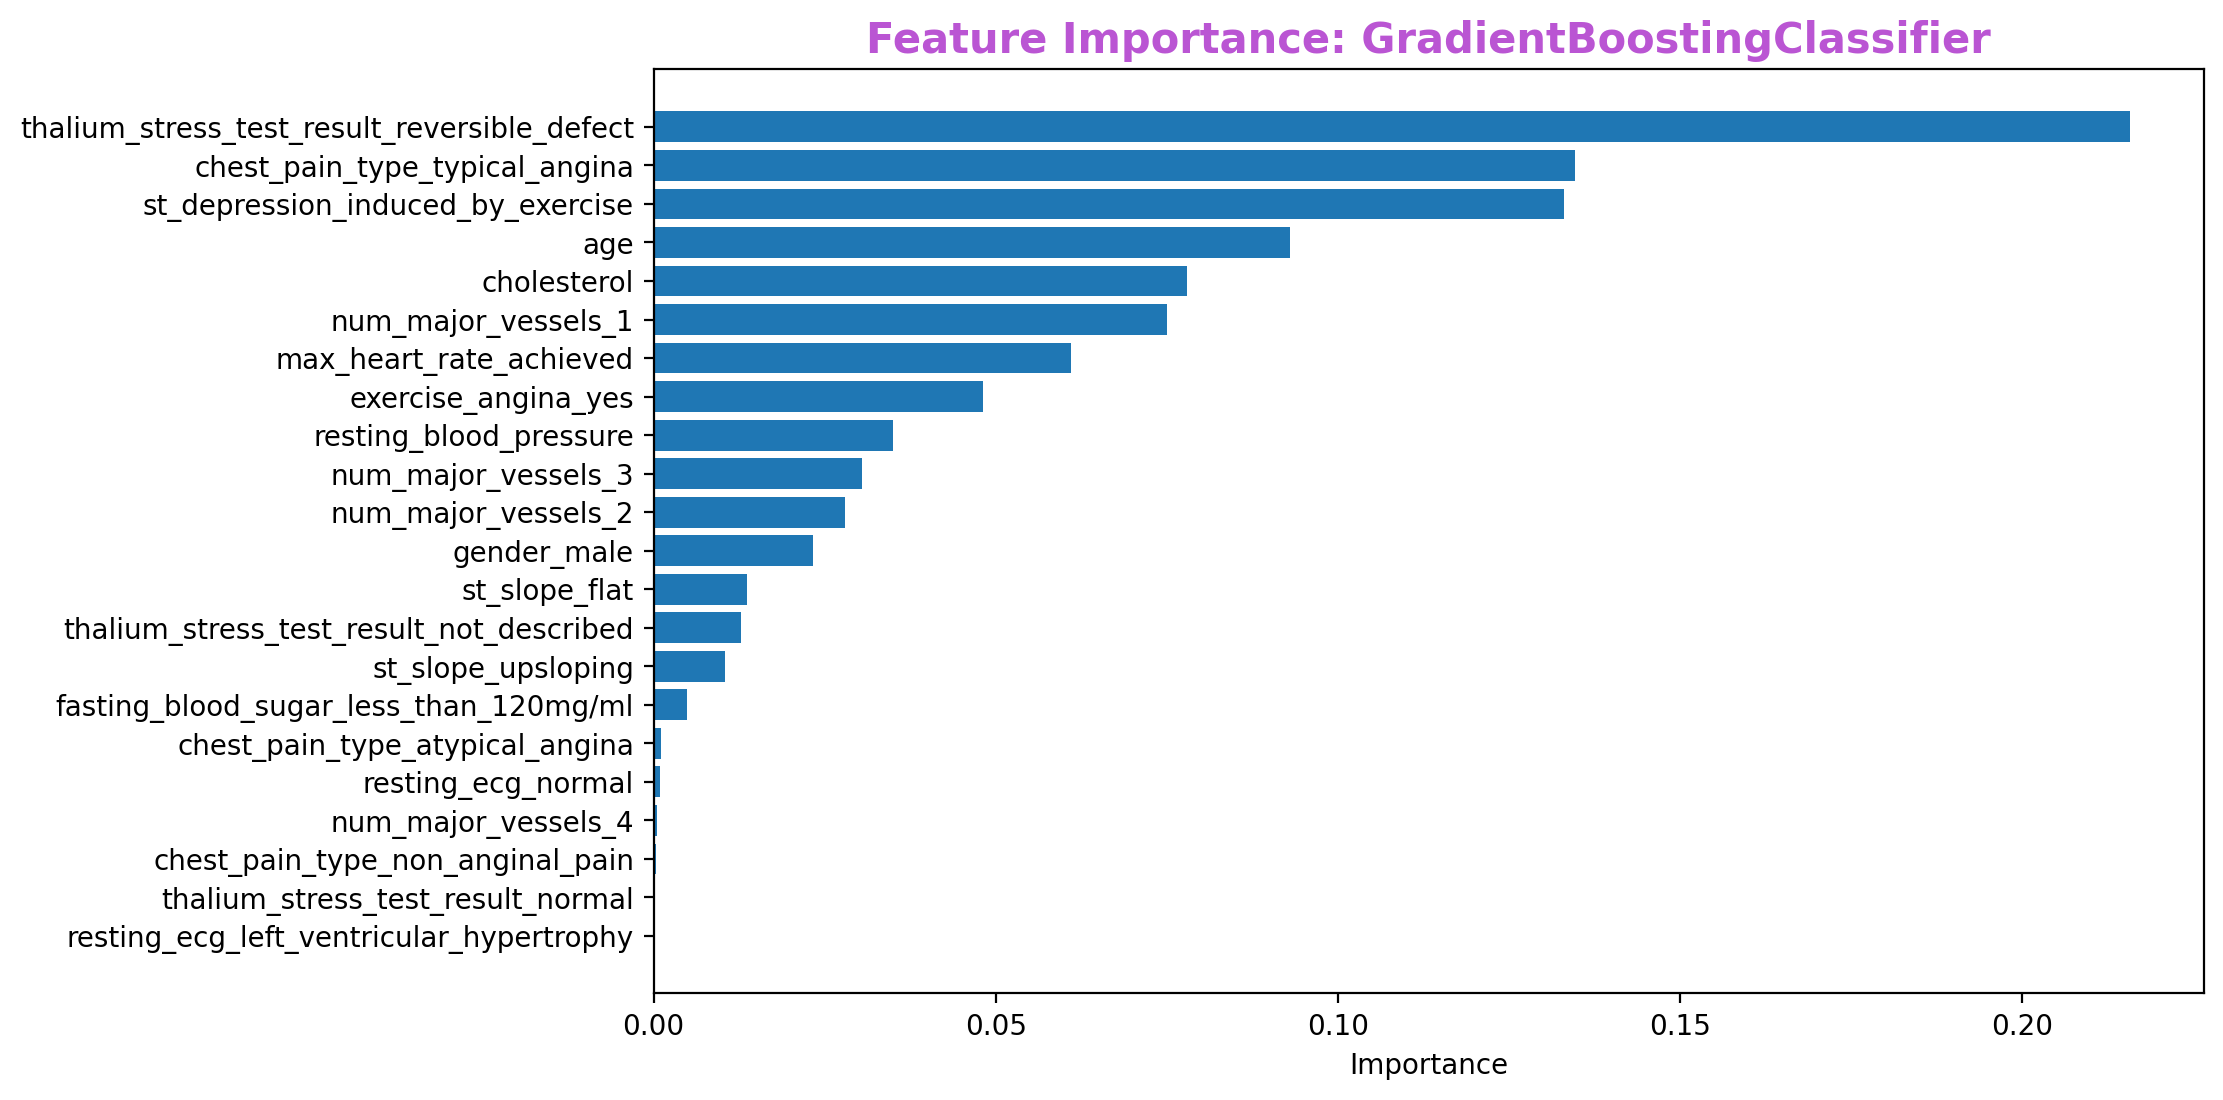

In [ ]:
# Learning curves
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="lower right")
    plt.grid(True)


# Feature importance plot
def plot_feature_importance(estimator, X):
    feature_importance = estimator.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importance)
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Importance')


# Plotting for RandomForestClassifier
plt.figure(figsize=(10, 6))
plot_learning_curve(random_forest, X_train, y_train)
plt.title("Learning Curve: RandomForestClassifier", fontsize=15, color='olive', fontweight='bold')
plt.show()

plt.figure(figsize=(10, 6))
plot_feature_importance(random_forest, X_train)
plt.title("Feature Importance: RandomForestClassifier", fontsize=15, color='mediumorchid', fontweight='bold')
plt.show()

# Plotting for DecisionTreeClassifier
plt.figure(figsize=(10, 6))
plot_learning_curve(pruned_decision_tree, X_train, y_train)
plt.title("Learning Curve: DecisionTreeClassifier", fontsize=15, color='olive', fontweight='bold')
plt.show()

plt.figure(figsize=(10, 6))
plot_feature_importance(pruned_decision_tree, X_train)
plt.title("Feature Importance: DecisionTreeClassifier", fontsize=15, color='mediumorchid', fontweight='bold')
plt.show()

# Plotting for GradientBoostingClassifier
plt.figure(figsize=(10, 6))
plot_learning_curve(gradient_boosting, X_train, y_train)
plt.title("Learning Curve: GradientBoostingClassifier", fontsize=15, color='olive', fontweight='bold')
plt.show()

plt.figure(figsize=(10, 6))
plot_feature_importance(gradient_boosting, X_train)
plt.title("Feature Importance: GradientBoostingClassifier", fontsize=15, color='mediumorchid', fontweight='bold')
plt.show()



# **Evaluation using ROC Curves**
This section evaluates the performance of the trained machine learning models for heart disease prediction using Receiver Operating Characteristic (ROC) curves.

An ROC curve is a visualization tool that depicts the model's ability to distinguish between positive and negative cases (presence or absence of heart disease in this case). It plots the True Positive Rate (TPR) on the y-axis against the False Positive Rate (FPR) on the x-axis. The ideal ROC curve goes through the top-left corner (TPR=1, FPR=0), indicating perfect classification.

The Area Under the Curve (AUC) is a metric that summarizes the ROC curve's performance. A higher AUC value signifies better model performance in distinguishing between classes.

This script defines a function plot_roc_curve that:

Calculates the predicted probabilities for the positive class (y_scores).
Computes False Positive Rate (fpr), True Positive Rate (tpr), and AUC using roc_curve from sklearn.metrics.
Creates the ROC curve plot with labels and legend.

<Figure size 2000x1200 with 0 Axes>

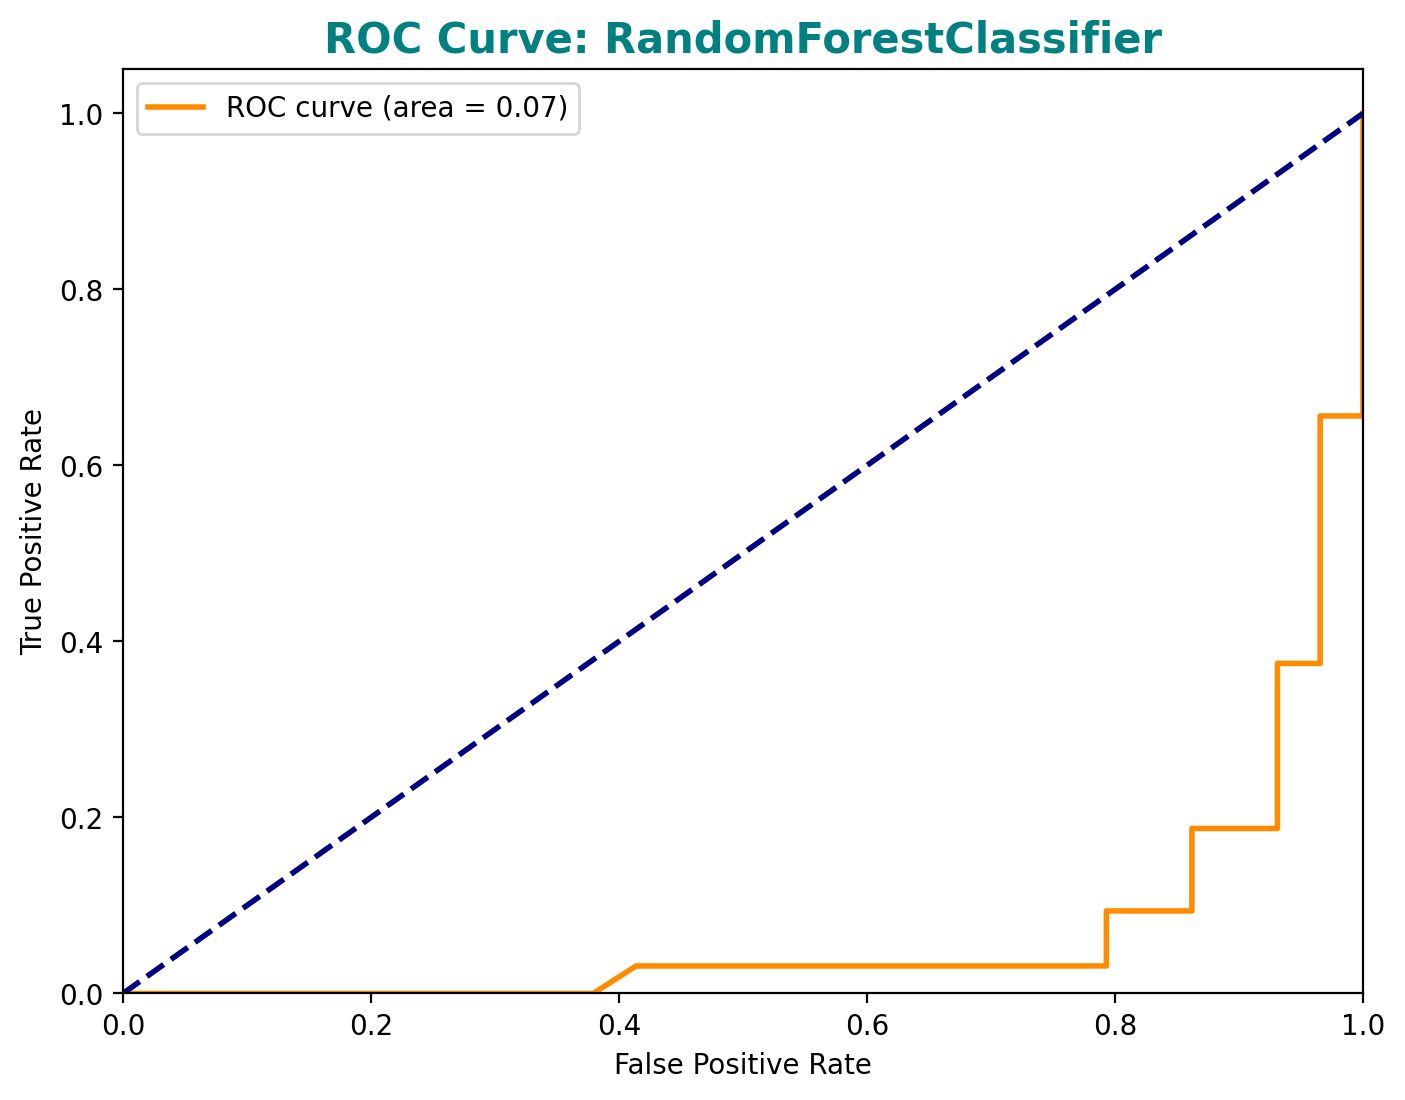

<Figure size 2000x1200 with 0 Axes>

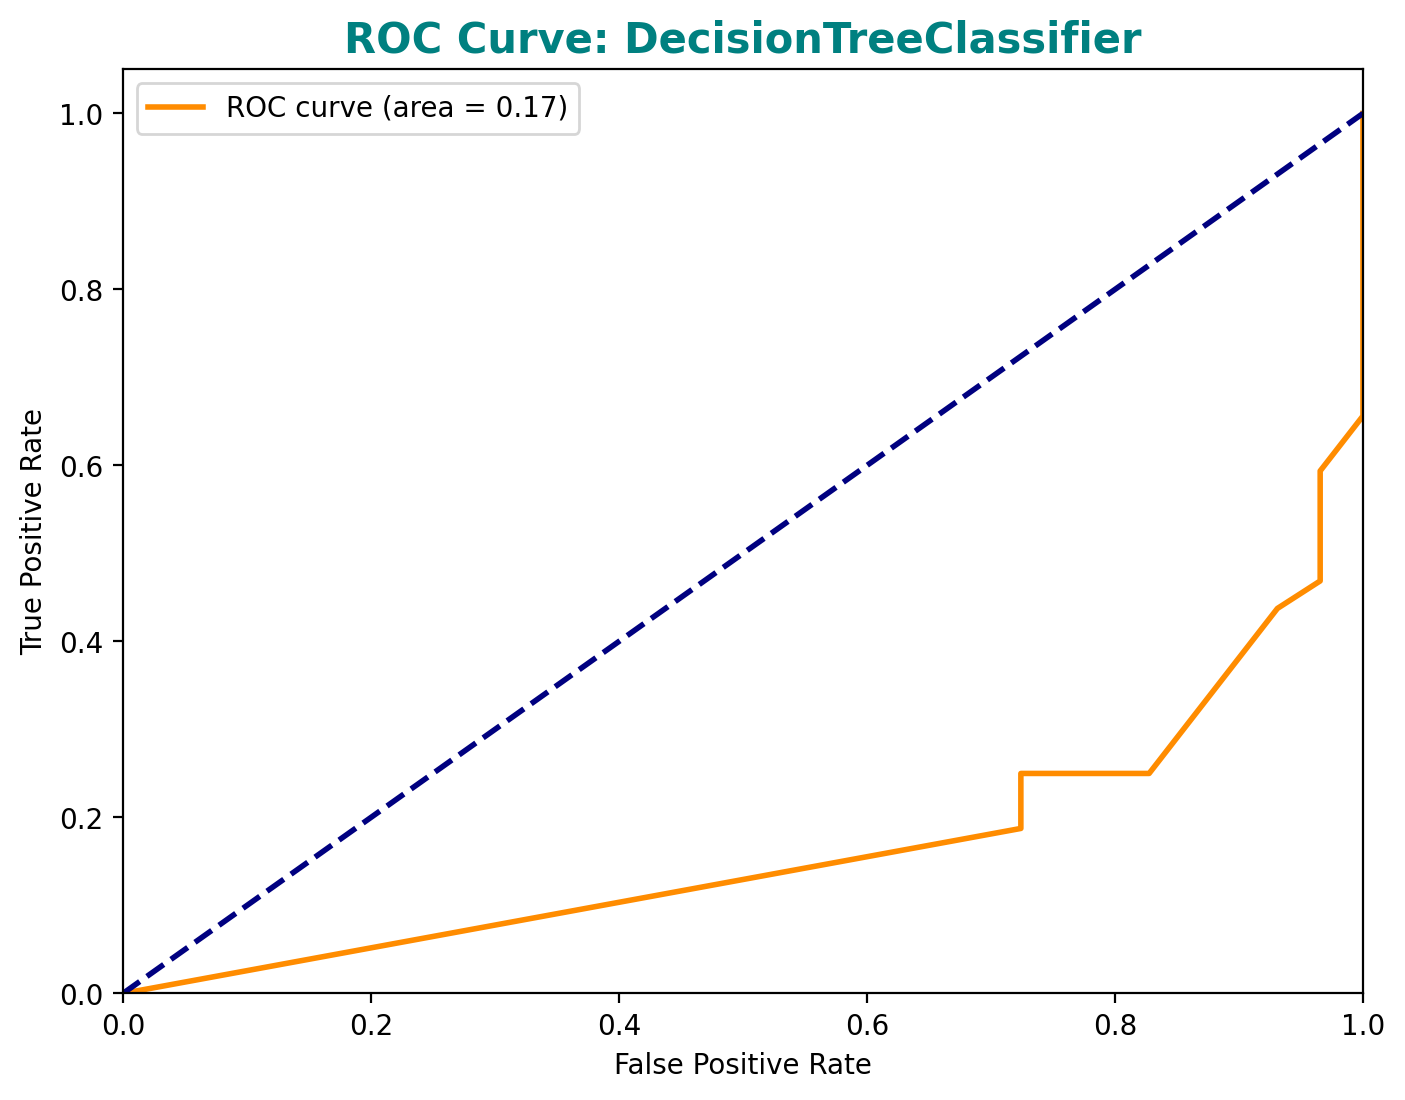

<Figure size 2000x1200 with 0 Axes>

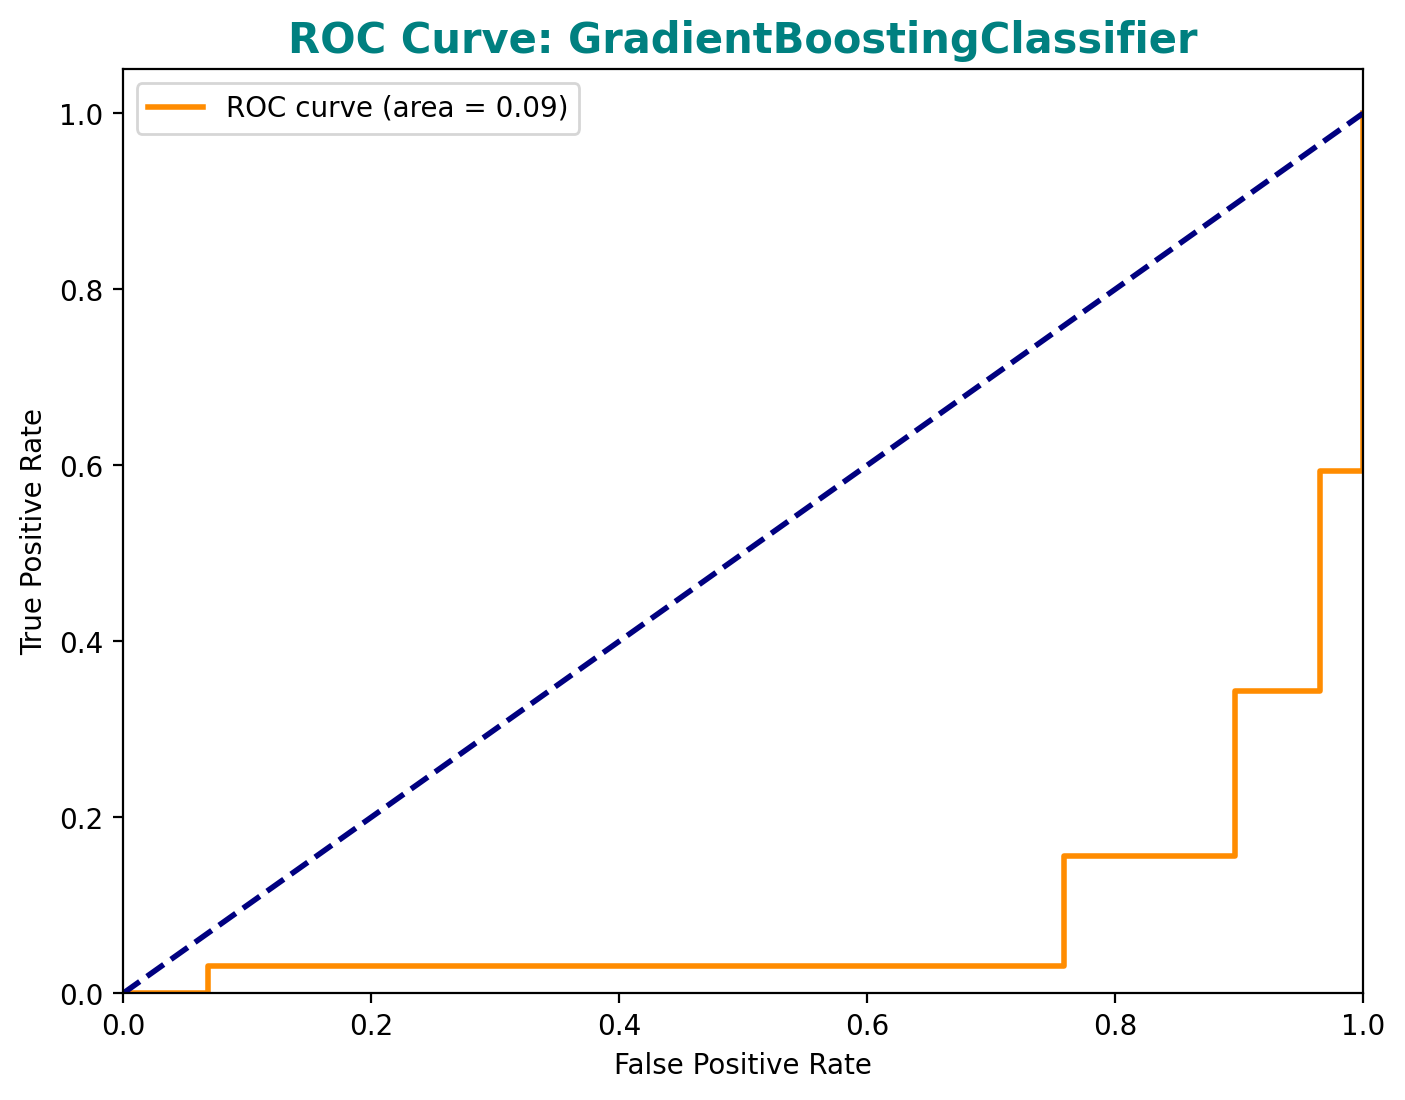

In [ ]:
# Define a function to plot ROC curve
def plot_roc_curve(estimator, X, y):
    y_scores = estimator.predict_proba(X)[:,1]
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    #plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="upper left")
    #plt.show()

# Encode labels as binary (1 for 'has_disease', 0 for 'no_disease')
y_test_binary = y_test.replace({'has_disease': 1, 'no_disease': 0})


# Plot ROC curve for RandomForestClassifier
plt.figure(figsize=(10, 6))
plot_roc_curve(random_forest, X_test, y_test_binary)
plt.title("ROC Curve: RandomForestClassifier", fontsize=15, color='teal', fontweight='bold')
plt.show()

# Plot ROC curve for DecisionTreeClassifier
plt.figure(figsize=(10, 6))
plot_roc_curve(pruned_decision_tree, X_test, y_test_binary)
plt.title("ROC Curve: DecisionTreeClassifier", fontsize=15, color='teal', fontweight='bold')
plt.show()

# Plot ROC curve for GradientBoostingClassifier
plt.figure(figsize=(10, 6))
plot_roc_curve(gradient_boosting, X_test, y_test_binary)
plt.title("ROC Curve: GradientBoostingClassifier", fontsize=15, color='teal', fontweight='bold')
plt.show()
